<a href="https://colab.research.google.com/github/Satorumi/Machine-Learning/blob/main/Machine_Learning_wR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learnning with R [Part 1]
Data Exploratory Analysis

- Identify features / target 
- Explore & Visualize Data
- Correlation Matrix

### Gathering data

**Sacramento House Price Data**



> contains house and sale price data for 932 homes in Sacramento CA

In [1]:
install.packages(c("tidyr", "caret", "dplyr"))

library(tidyr)
library(dplyr)
library(caret)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lattice

Loading required package: ggplot2

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [2]:
data(Sacramento)

In [3]:
print(c(typeof(Sacramento), dim(Sacramento), ncol(Sacramento)))

[1] "list" "932"  "9"    "9"   


In [4]:
str(Sacramento)

'data.frame':	932 obs. of  9 variables:
 $ city     : Factor w/ 37 levels "ANTELOPE","AUBURN",..: 34 34 34 34 34 34 34 34 29 31 ...
 $ zip      : Factor w/ 68 levels "z95603","z95608",..: 64 52 44 44 53 65 66 49 24 25 ...
 $ beds     : int  2 3 2 2 2 3 3 3 2 3 ...
 $ baths    : num  1 1 1 1 1 1 2 1 2 2 ...
 $ sqft     : int  836 1167 796 852 797 1122 1104 1177 941 1146 ...
 $ type     : Factor w/ 3 levels "Condo","Multi_Family",..: 3 3 3 3 3 1 3 3 1 3 ...
 $ price    : int  59222 68212 68880 69307 81900 89921 90895 91002 94905 98937 ...
 $ latitude : num  38.6 38.5 38.6 38.6 38.5 ...
 $ longitude: num  -121 -121 -121 -121 -121 ...


In [5]:
head(Sacramento, 4)

,city,zip,beds,baths,sqft,type,price,latitude,longitude
,<fct>,<fct>,<int>,<dbl>,<int>,<fct>,<int>,<dbl>,<dbl>
1,SACRAMENTO,z95838,2,1,836,Residential,59222,38.63191,-121.4349
2,SACRAMENTO,z95823,3,1,1167,Residential,68212,38.47890,-121.4310
3,SACRAMENTO,z95815,2,1,796,Residential,68880,38.61830,-121.4438
4,SACRAMENTO,z95815,2,1,852,Residential,69307,38.61684,-121.4391


### EDA

In [6]:
install.packages(c("ggplot2", "skimr", "ggtext", "corrplot", "gridExtra", "ggExtra", "reshape", "ggpubr"))
install.packages(c("lattice", "scales", "ggridges", "viridis", "rlang", "RColorBrewer", "patchwork", "ggpmisc"))

packages <- c("lattice", "scales", "ggridges", "viridis", "rlang", "RColorBrewer", "gridExtra",  "ggpmisc",
          "corrplot", "gridExtra", "ggExtra", "reshape", "ggpubr", "ggplot2", "skimr", "ggtext", "patchwork")
lapply(packages, require, character.only = TRUE)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘bitops’, ‘sass’, ‘jquerylib’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘RCurl’, ‘png’, ‘jpeg’, ‘htmlwidgets’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘bslib’, ‘car’, ‘gridtext’, ‘colourpicker’, ‘miniUI’, ‘shiny’, ‘shinyjs’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘ggpp’, ‘splus2R’


Loading required package: scales

Loading required package: ggridges

Loading required package: viridis

Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal


Loading required package: 

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

Quickly explore Scramento data

In [7]:
skim(Sacramento)

── Data Summary ────────────────────────
                           Values    
Name                       Sacramento
Number of rows             932       
Number of columns          9         
_______________________              
Column type frequency:               
  factor                   3         
  numeric                  6         
________________________             
Group variables            None      

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique
1 city                  0             1 FALSE         37
2 zip                   0             1 FALSE         68
3 type                  0             1 FALSE          3
  top_counts                          
1 SAC: 438, ELK: 114, ROS: 48, CIT: 35
2 z95: 61, z95: 45, z95: 44, z95: 37  
3 Res: 866, Con: 53, Mul: 13          

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing compl

#####Identify data

In [8]:
sum(is.na(Sacramento))

[1] 0

Define target/features columns. Idenitfy categorical and numerical values

In [9]:
target_col <- "price"
numerical_cols <- colnames(Filter(is.numeric, Sacramento))
numerical_cols <- numerical_cols[!numerical_cols %in% c(target_col, "beds", "baths")]
categorical_cols <- colnames(Sacramento)[!colnames(Sacramento) %in% c(numerical_cols, target_col)]

#####Setting default configures 


> Define Functionefor Visualization



In [10]:
discreate_palette <- "Set2"
sequential_palette <- "Blues"
diverging_palette <- "Spectral"
getPalette <- colorRampPalette(brewer.pal(8, "Set2"))

options(repr.plot.width = 12, repr.plot.height = 8)
theme_set(theme_minimal(base_size = 10))
theme_update(plot.title = element_text(size = 18, face = "bold"), plot.subtitle = element_text(size = 15, face = "italic"), 
          plot.caption = element_text(size = 12))

##### Visualization Function

In [113]:
create_table <- function(data, val = "price", group = "type", table_theme = "minimal") {
  stats <- c(group, "mean", "median", "sd", "max", "min")
  table <- desc_statby(data,  measure.var = val, grps = group)[, stats]
  table <- ggtexttable(table, cols = stats, rows = NULL, theme = ttheme(table_theme))
  return(table)
}

In [14]:
max_density <- function(obj) {
  density <- density(obj)
  max <- which.max(density$y)
  x <- density$x[max]
  y <- density$y[max]
  return(c(x, y))
}

In [127]:
density_plot <- function(data, x, group = type, fill = TRUE, pal = "Spectral") {
  if (fill == TRUE) {
    d <- ggplot(Sacramento, aes(x = {{x}}, fill = {{group}})) + scale_fill_brewer(palette = pal) + labs(y = "Density")
  } else {
    d <- ggplot(Sacramento, aes(x = {{x}}, color = {{group}}))
  }

  label_data <- data %>% group_by({{group}}) %>% mutate(x = max_density({{x}})[1], y = max_density({{x}})[2])
  d + geom_density(alpha = .4) + 
        geom_vline(data = label_data, aes(xintercept = x, color = {{group}}), linetype = "dashed", show.legend = FALSE) +
        geom_label(data = label_data, aes(x, y * 1.05, label = number(x, accuracy = 0.01), color = {{group}}), fill = "white", show.legend = FALSE) +
        scale_x_continuous(labels = number) +
        scale_color_brewer(palette = pal)
}

In [192]:
plot_segmented_bar <- function(data, x, group, pal = "Spectral") {
  plot_data <- data %>% 
  group_by({{x}}, {{group}}) %>%
  summarize(n = n()) %>%
  mutate(pct = n / sum(n), label = scales::percent(pct))
  
  ggplot(plot_data, aes(x = {{x}}, y = pct, fill = {{group}})) +
    geom_bar(position = "fill", stat = "identity") +
    scale_fill_brewer(palette = pal) +
    scale_y_continuous(breaks = seq(0, 1, .2), label = percent) +
    geom_text(aes(label = label), size = 3, position = position_stack(vjust = 0.5))
}

In [130]:
plot_histogram <- function(data, x, fill = TRUE, mean_line = TRUE, col = NULL, low = "burlywood1", high = "chocolate3") {
  if (is.null(col)) {
    plot <- ggplot(data, aes(x = {{x}}, fill = ..count..)) +
    geom_histogram(bins = 60, alpha = 0.8)

  } else if (fill == TRUE) {
    plot <- ggplot(data, aes(x = {{x}}, fill = ..count..)) +
          geom_histogram(bins = 60, alpha = .8, color = col)
  } else {            
    plot <- ggplot(data, aes(x = {{x}}, fill = ..count..)) +
          geom_histogram(bins = 60, alpha = .8, fill = "white", color = col) 
  }
    
  plot <- plot + scale_fill_gradient(low = low, high = high, guide = "none")

  if (mean_line == TRUE) {
    plot <- plot + geom_vline(aes(xintercept = mean({{x}})), linetype = "dashed")
  }
  return(plot)
}

In [32]:
plot_radar <- function(data, x, xlab, high = "darkred", low = "orange") {
  plot_data <- Sacramento %>%
    group_by({{x}}) %>%
    summarize(max_price = max(price), mean_price = mean(price), min_price = min(price), n = n()
    ) %>%
    mutate(mean_price = round(mean_price, digits = 0))

  ggplot(plot_data) + 
    geom_col(aes(x = reorder({{x}}, mean_price), y = mean_price, fill = mean_price), position = "dodge2", show.legend = TRUE, alpha = .9) +
    geom_point(aes(x = reorder({{x}}, mean_price), y = min_price), color = "gray12", size = 4.8) + 
    geom_segment(aes(x = reorder({{x}}, mean_price), y = 0, xend = reorder({{x}}, mean_price), yend = 6e+05), size = .8, linetype = "dashed", color = "gray12", show.legend = FALSE) + 
    scale_y_continuous(labels = scales::dollar) + scale_fill_gradient(high = high, low = low, labels = scales::dollar) +
    coord_polar() + 
    theme(axis.text.x = element_text(color = "gray12", size = 17), legend.position = "bottom", text = element_text(size = 30)) + 
    theme_classic2() + labs(x = xlab, y = "Average Price", fill = "Average Price")
}

In [143]:
visualize_boxplot <- function(data, x, y, pal = "RdBu") {
  ggplot(data, aes(x = {{x}}, y = {{y}}, fill = {{x}})) +
    geom_boxplot(outlier.size = 2) +
    scale_fill_brewer(palette = pal) +
    geom_jitter(alpha = .7) + 
    scale_y_continuous(labels = number)
}

In [153]:
bubble_chart <- function(data, x, y, color = type, size = price, pal = "Blues") {
  ggplot(Sacramento, aes(x = {{x}}, y = {{y}}, size = {{size}}, color = {{color}})) + 
  geom_point(alpha = .7) + 
  scale_color_brewer(palette = pal) +
  geom_label(data = top_n(data, 3, {{size}}), aes(x = {{x}} * 1.001, y = {{y}} * 1.001, color = {{color}}, label = number({{size}})), show.legend = FALSE) +
  scale_size(range = c(3, 4), labels = number)
}

In [ ]:
plot_scatter <- function(data, x, y = price, col = type, pal = "RdBu", rug = TRUE, lm = TRUE, top_n = 3) {
  plot <- ggplot(data, aes({{x}}, {{y}})) +
        geom_point(aes(color = {{col}}), size = 3) + 
        scale_color_brewer(palette = pal) +
        scale_y_continuous(labels = scales::dollar) +
        theme_minimal() + theme(axis.text = element_text(size = 10), axis.title = element_text(size = 14))

  if (rug == TRUE) {
    plot <- plot + geom_rug(aes(color = {{col}}, alpha = .3), show.legend = FALSE)
  }

  if (lm == TRUE) {
    plot <- plot + geom_smooth(aes(group = {{col}}, col = {{col}}), method = "lm", se = FALSE)
  }

  if (!is.null(top_n)) {
    plot <- plot + geom_label(data = top_n(data, top_n, {{y}}), 
                         aes(x = {{x}} * 1.003, y = {{y}}, label = paste0({{x}} , ": ", dollar({{y}})), col = {{col}}), size = 4, position = "nudge")
  }
  return(plot)
}

In [ ]:
visualize_pointrange <- function(data, x, y, pal = "Spectral") {
  plot_data <- data %>% group_by({{x}}) %>% mutate(ymax = max({{y}}), ymin = min({{y}}), avg = mean({{y}}))
  ggplot(plot_data, aes(x = {{x}}, y = avg, ymax = ymax, ymin = ymin, color ={{x}})) + 
  geom_pointrange() + geom_label(aes(x = {{x}}, y = avg, label = round(avg, 1), color = {{x}}), vjust = -0.4, show.legend = FALSE) +
  scale_color_brewer(palette = pal) + coord_flip()
}

##### Price distribution

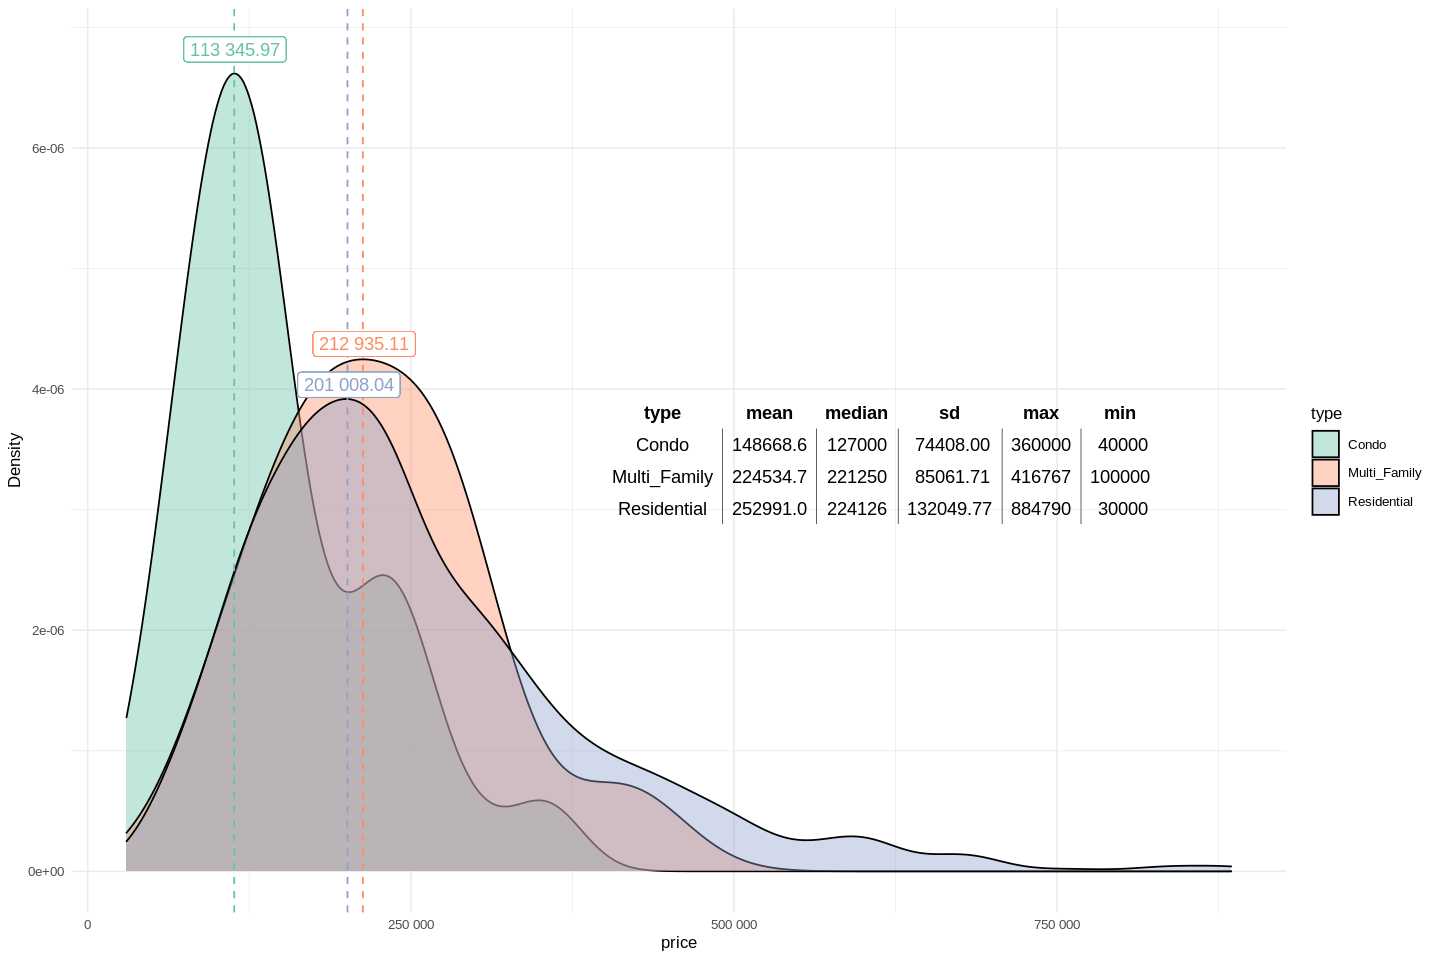

In [128]:
d <- density_plot(Sacramento, price, group = type, pal = "Set2", fill = TRUE)
table <- create_table(Sacramento, "price", "type")
d + annotation_custom(ggplotGrob(table), xmin = 300000)

#### Numerical Data

##### Longitude / Latitude Distribution 

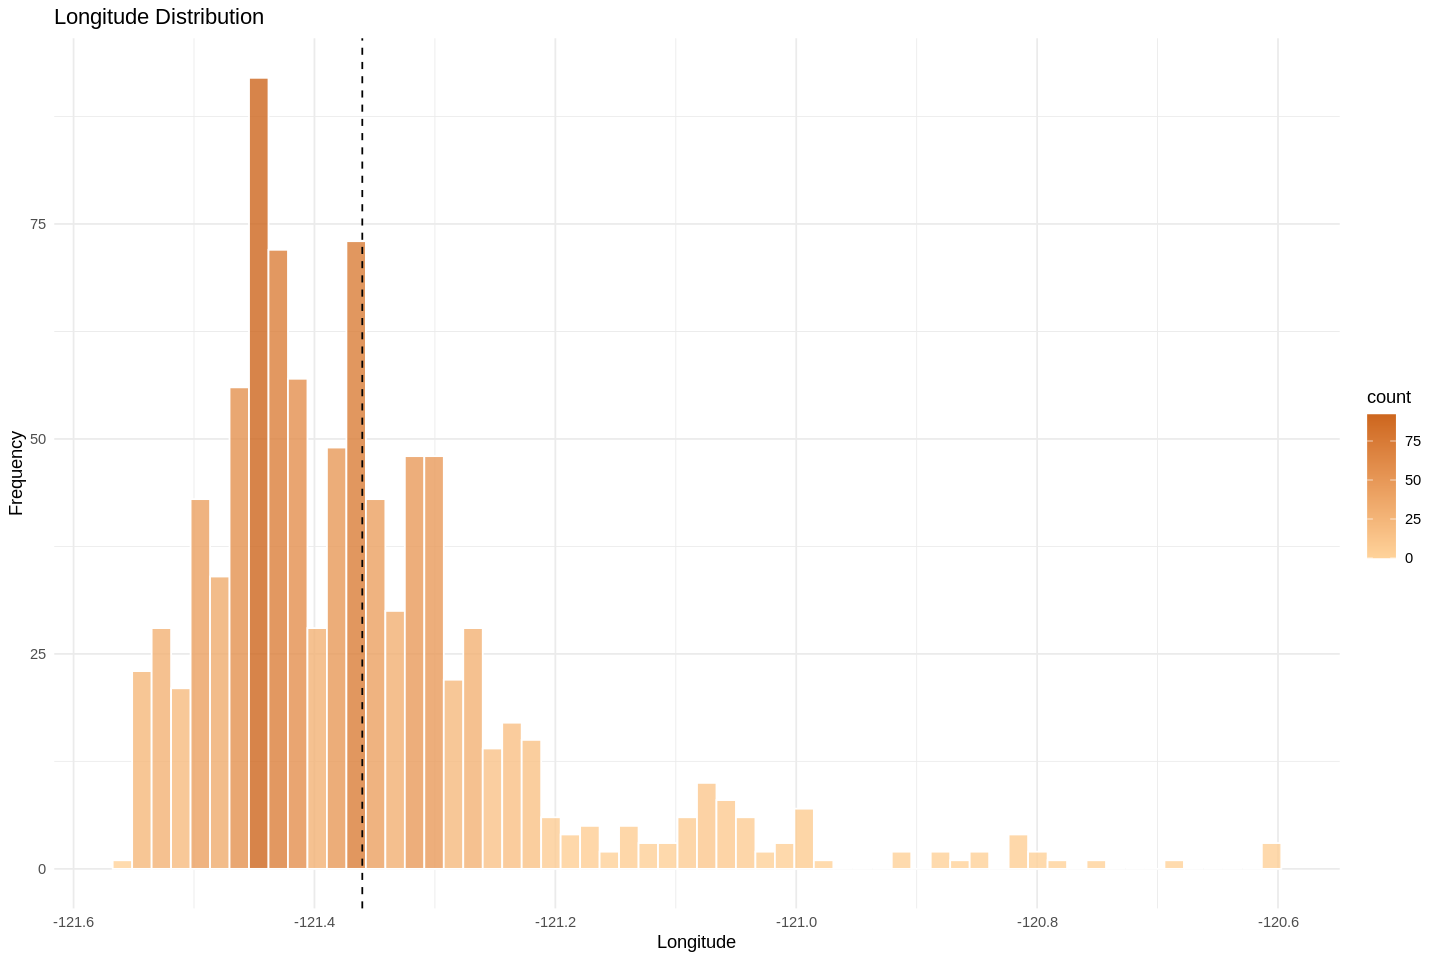

In [97]:
plot_histogram(Sacramento, longitude, xlab = "Longitude", mean_line = TRUE, col = "white", fill = TRUE);

Latitude

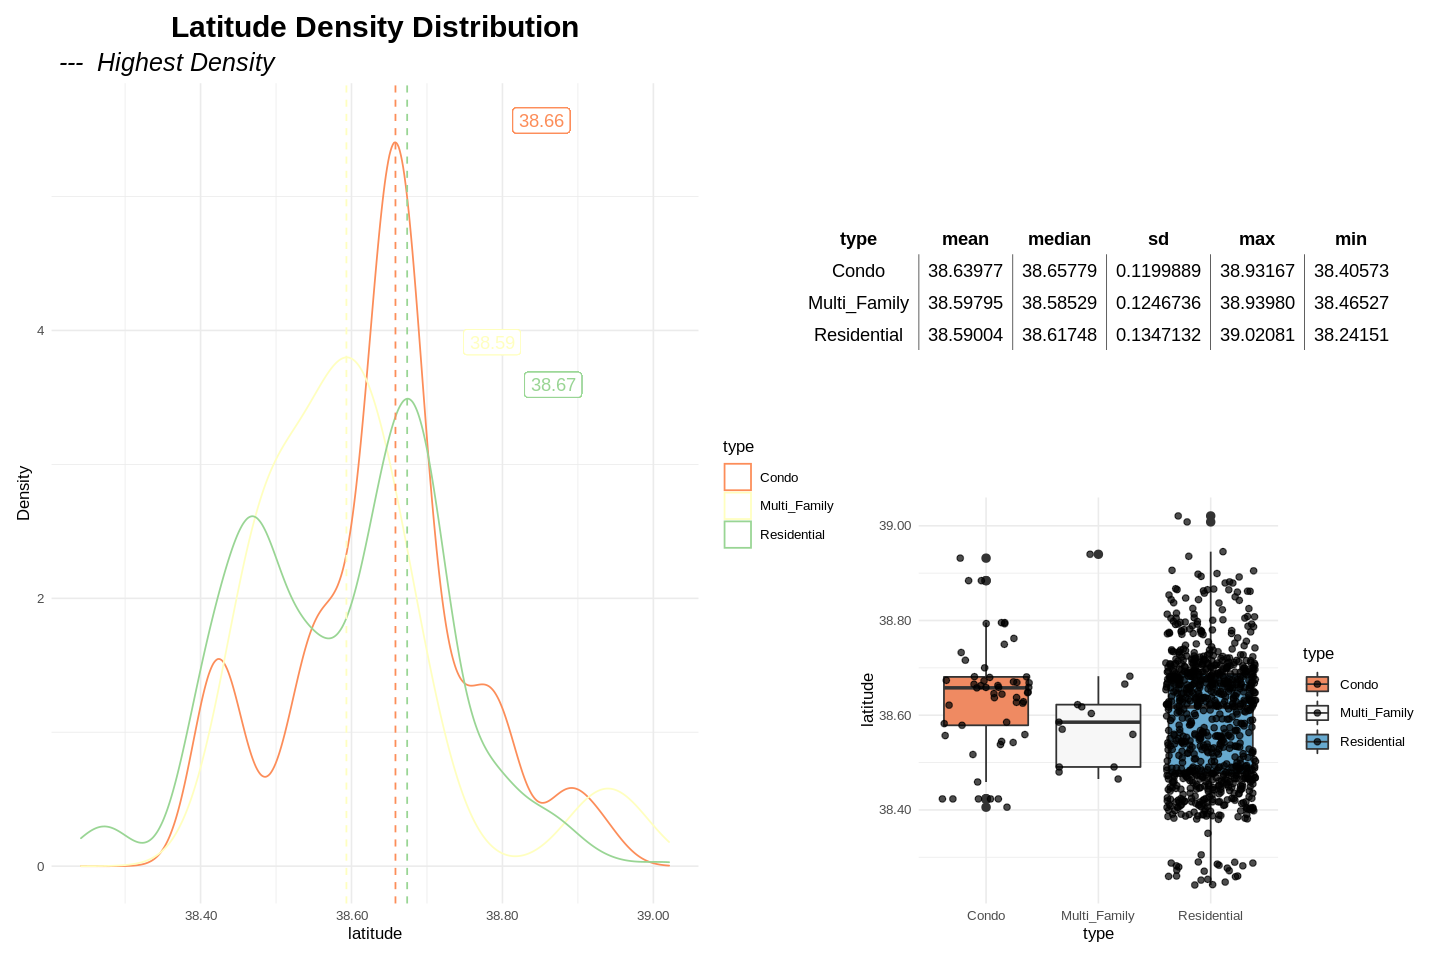

In [206]:
d <- density_plot(Sacramento, latitude, fill = FALSE) + labs(title = "Latitude Density Distribution", y = "Density", subtitle = " ---  Highest Density")
bp <- visualize_boxplot(Sacramento, type, latitude)
t <- create_table(Sacramento, "latitude", "type")

(d | t / bp) + plot_layout(widths = c(0.9, 0.5)) 

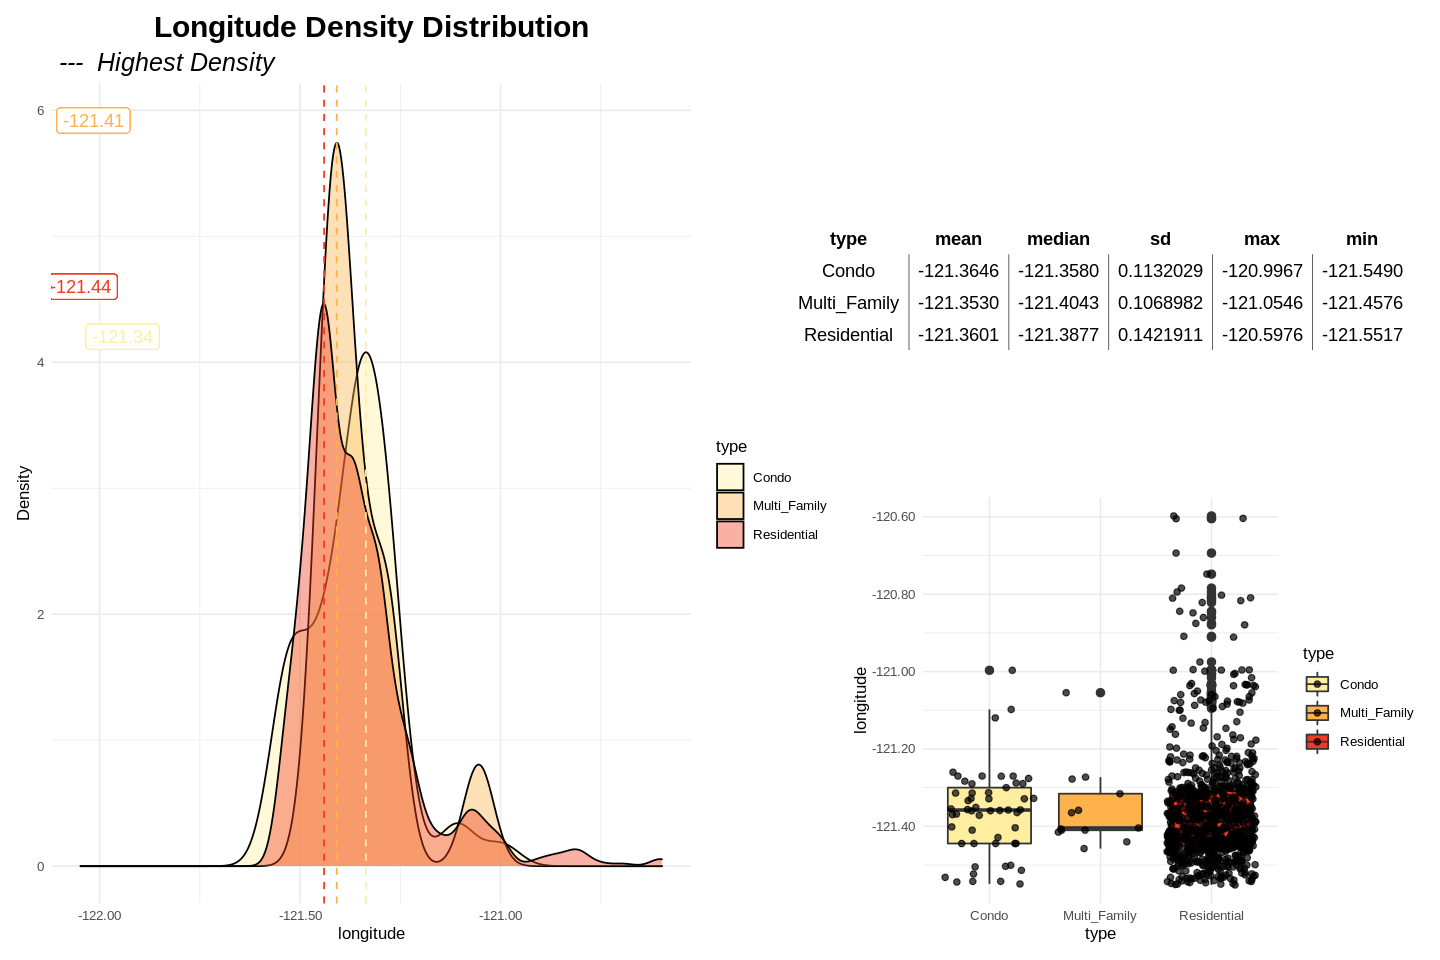

In [205]:
d <- density_plot(Sacramento, longitude, pal = "YlOrRd")  + labs(title = "Longitude Density Distribution", y = "Density", subtitle = " ---  Highest Density")
bp <- visualize_boxplot(Sacramento, type, longitude, pal = "YlOrRd")
t <- create_table(Sacramento, "longitude", "type")

(d | t / bp) + plot_layout(widths = c(0.9, 0.5), height = c(1, 0.3, 0.7)) 

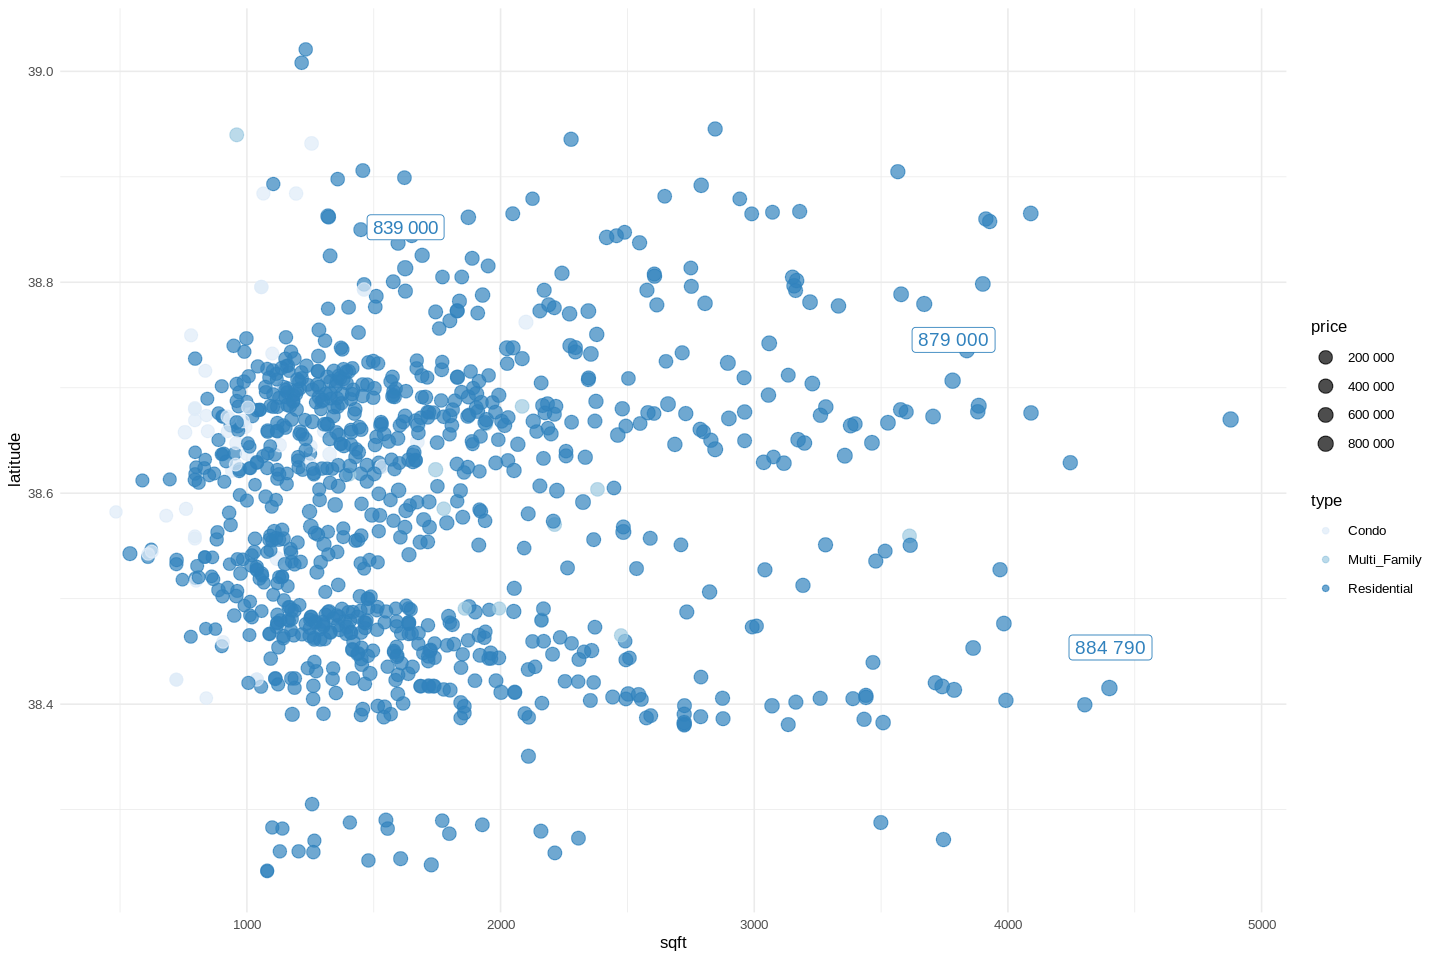

In [217]:
bubble_chart(Sacramento, sqft, latitude, size  = price)

##### House Area Distribution

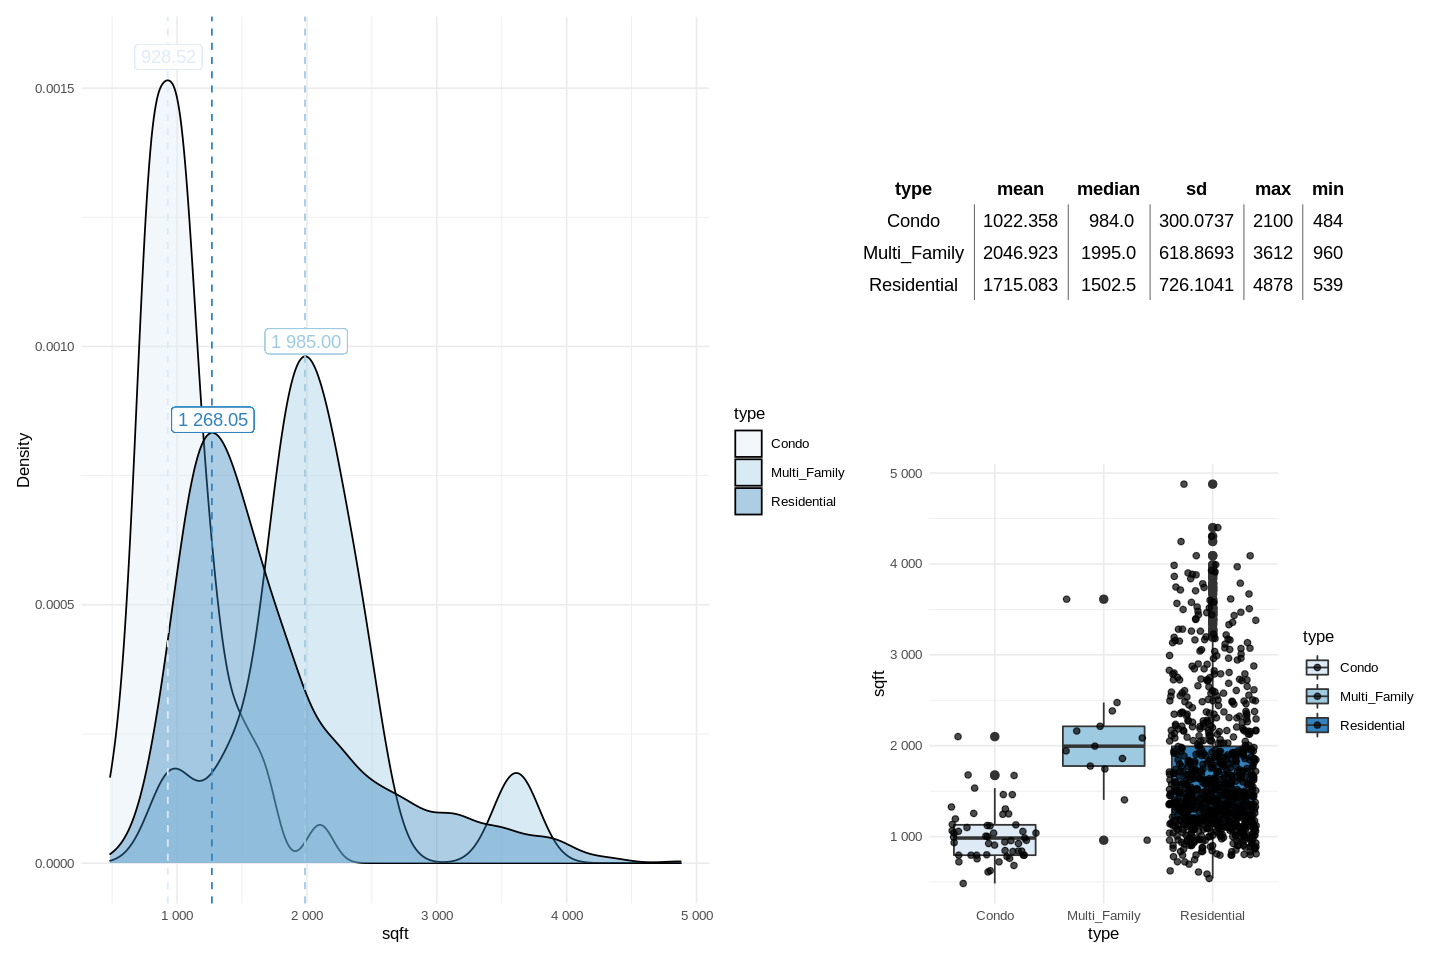

In [203]:
d <- density_plot(Sacramento, sqft, pal = "Blues")
t <- create_table(Sacramento, "sqft", "type")
bp <-visualize_boxplot(Sacramento, x = type, y = sqft, pal = "Blues")

(d | t / bp) + plot_layout(widths = c(0.9, 0.5))

#### Categorical Data

  ##### City Distribution

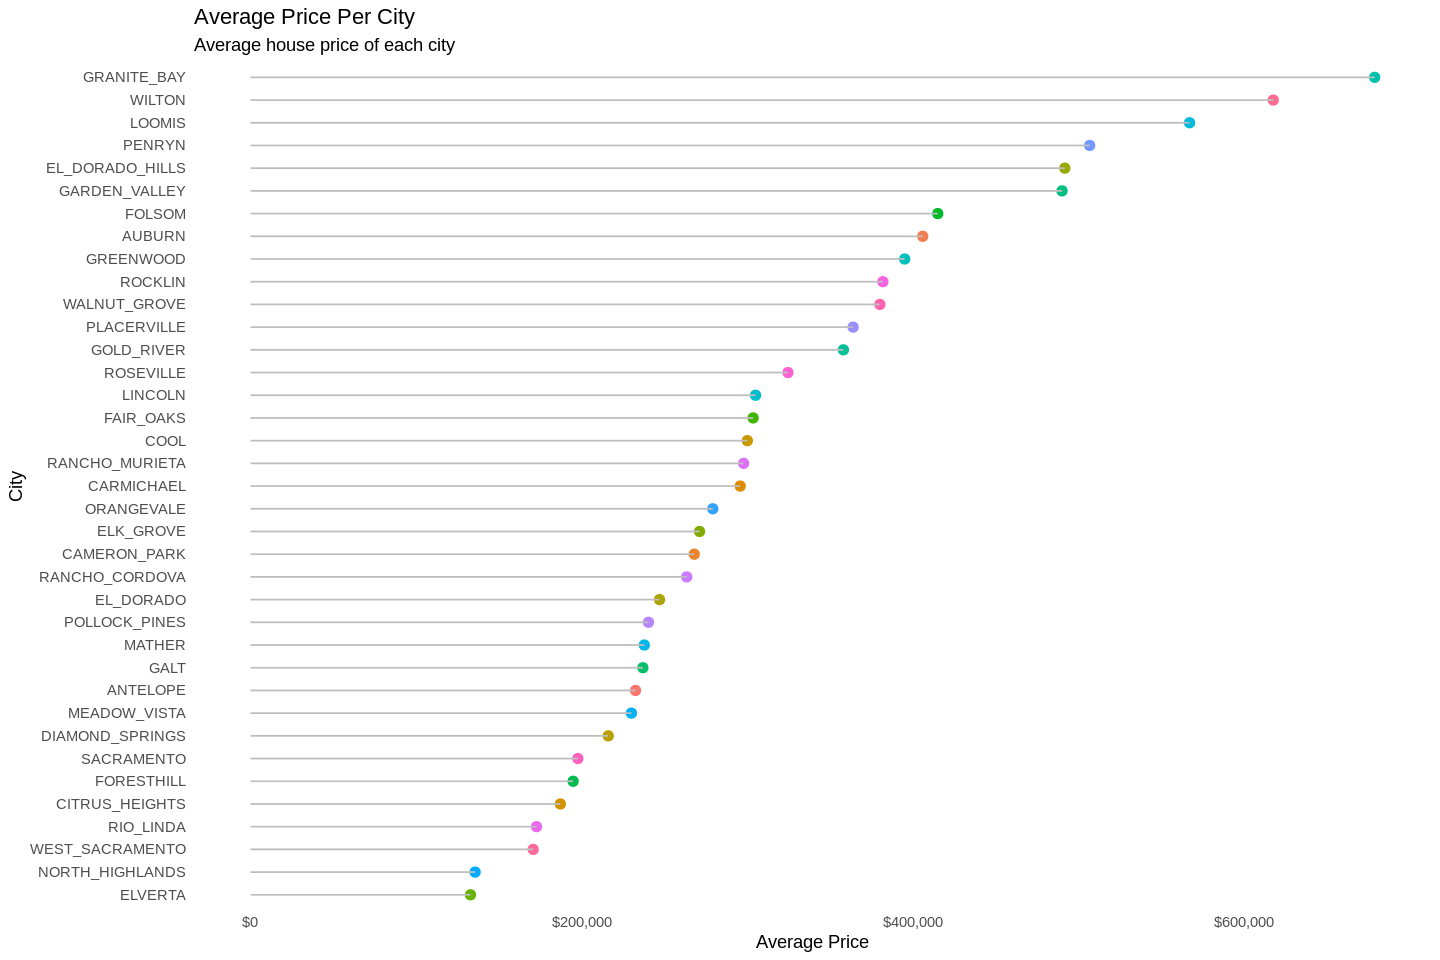

In [20]:
plot_data <- aggregate(price ~ city, Sacramento, mean)
colourCount <- length(plot_data$city)

ggplot(plot_data, aes(x = price, y = reorder(city, price))) + 
  geom_point(aes(color = city), size = 2.5) +
  geom_segment(aes(x = 20, xend = price, y = reorder(city, price), yend = reorder(city, price)), color = "grey") + 
  scale_x_continuous(labels = scales::dollar_format()) +
  scale_fill_manual(values = getPalette(colourCount)) +
  labs(x = "Average Price", y = "City", title = "Average Price Per City", subtitle = "Average house price of each city") +
  theme_minimal() + 
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), legend.position = "none");

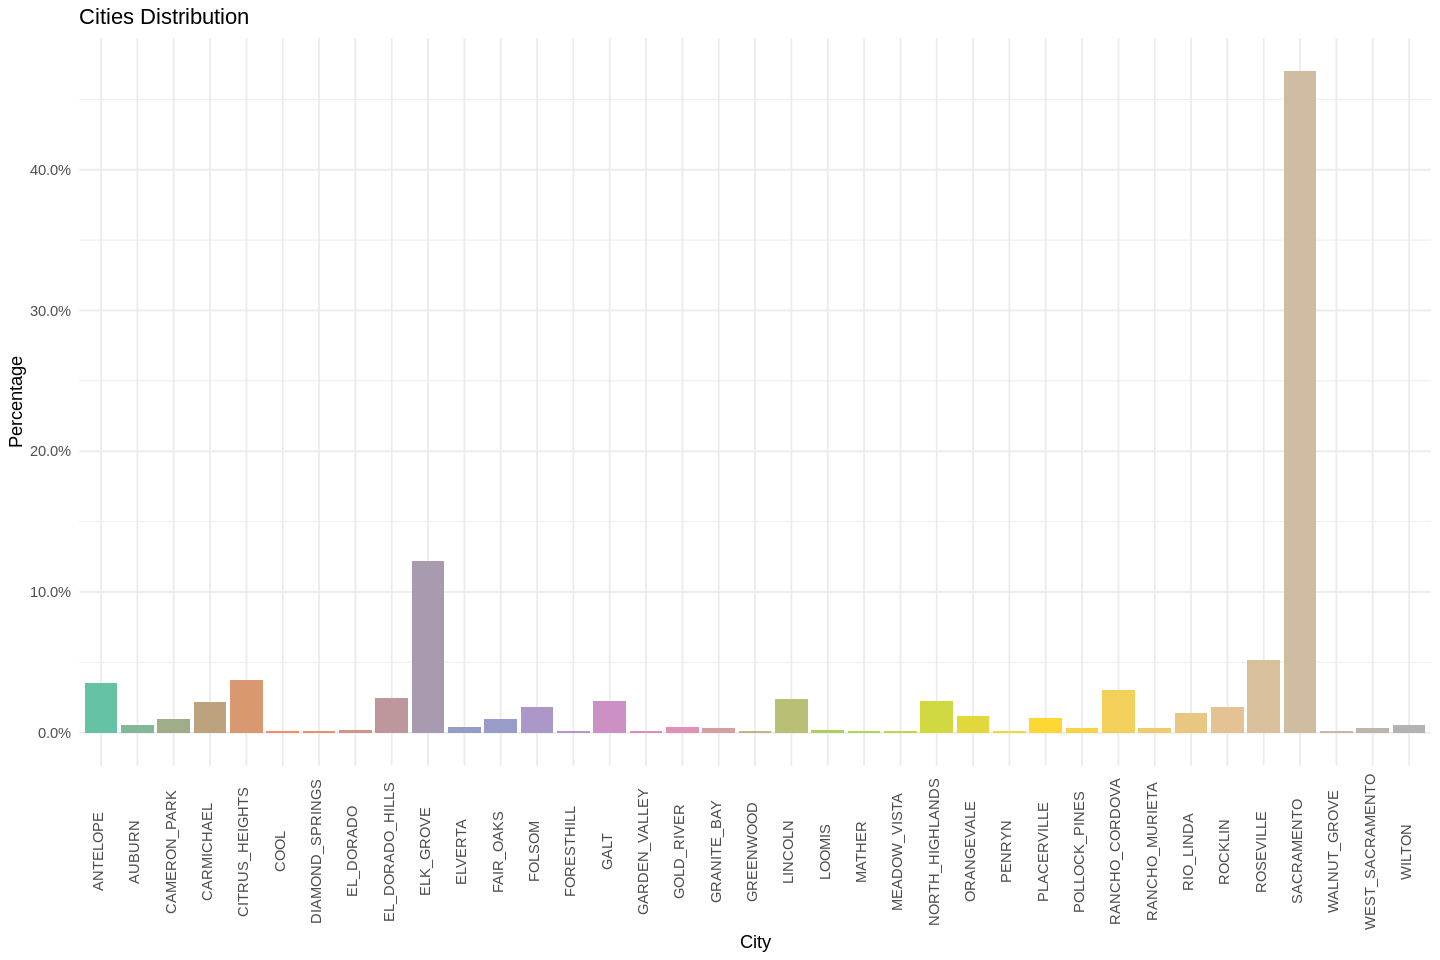

In [21]:
colourCount <- length(unique(Sacramento$city))

ggplot(Sacramento, aes(x = city, y = ..count.. / sum(..count..), fill = city)) + 
  geom_bar() + scale_y_continuous(labels = scales::percent) + 
  scale_fill_manual(values = getPalette(colourCount)) +
  labs(x = "City", y = "Percentage", title = "Cities Distribution") + theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.2, hjust=.5), legend.position = "none");

##### Average House Price by Zip

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



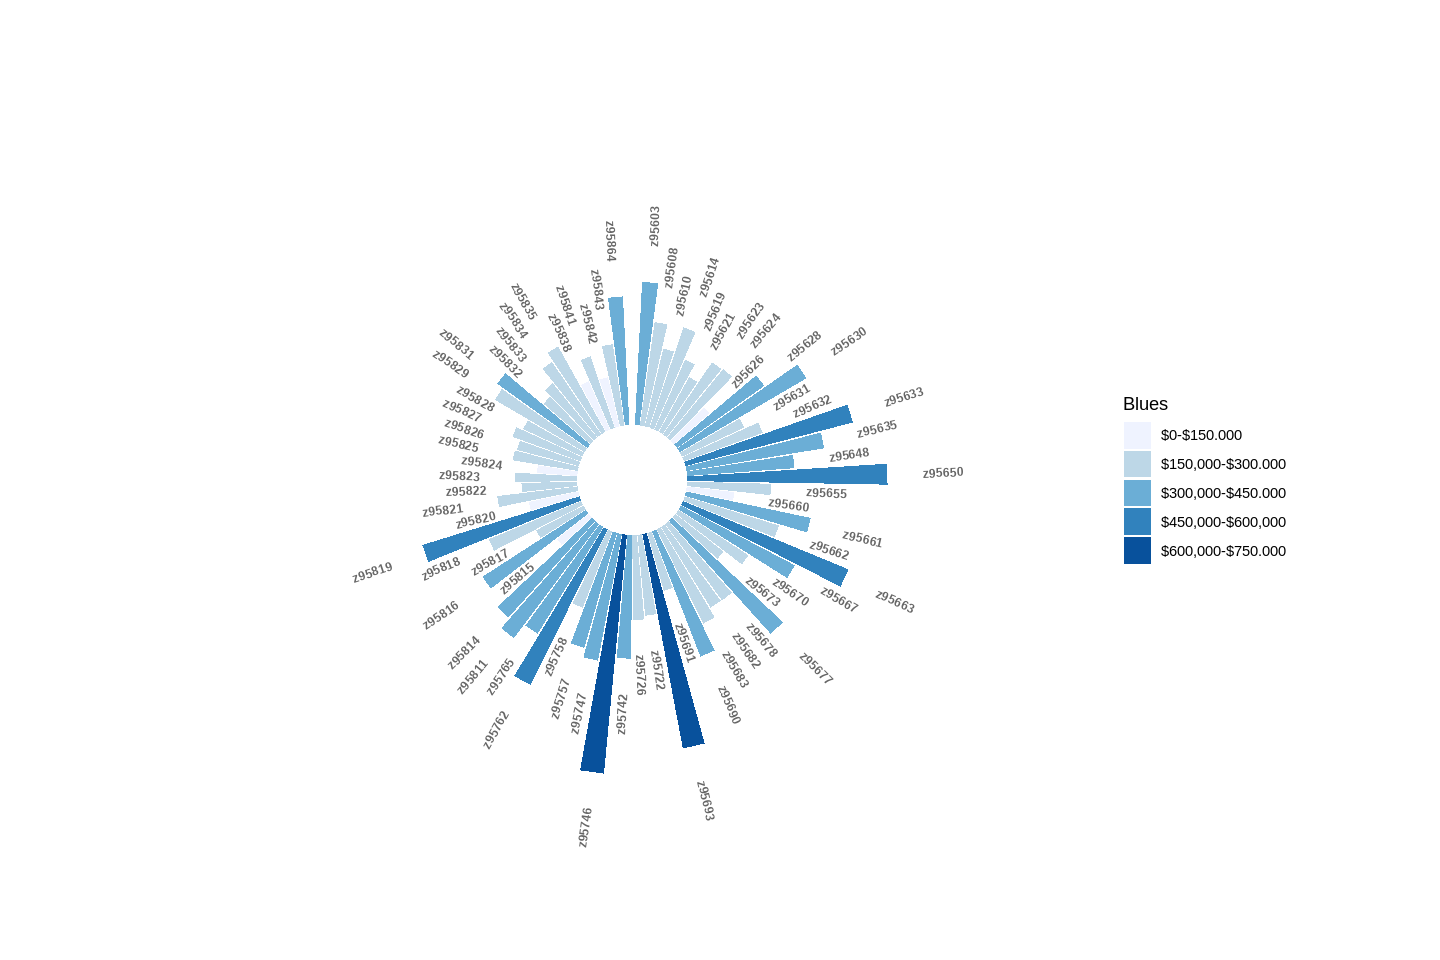

In [22]:
data <- aggregate(price ~ zip, Sacramento, mean)

data$id <- seq(1, nrow(data))

data$range <- cut(data$price, breaks = seq(0, 750, by = 150) * 1000, 
                  labels = c("$0-$150.000", "$150,000-$300.000", "$300,000-$450.000","$450,000-$600,000", "$600,000-$750.000"))

label_data <- data
nbar <- nrow(label_data)
angle <- 90 - 360 * (label_data$id - 0.5) / nbar 
label_data$hjust <- ifelse(angle < -90, 1, 0)
label_data$angle <- ifelse(angle < -90, angle + 180, angle)
 
# Make the plot
ggplot(data, aes(x = as.factor(id), y = price, fill = range)) +
 geom_bar(stat = "identity") +
  ylim(limits = c(-220000, 750000)) +
  scale_y_continuous(expand = c(.2, 0)) + scale_x_discrete(expand = c(0, 1)) +
  theme_void() + theme(plot.margin = unit(rep(-1, 4), "pt") ) +
  scale_fill_brewer(sequential_palette) +
  coord_polar(start = 0) + 
  
  geom_text(data = label_data, aes(x = id, y = price + 100000, label = zip, hjust = hjust), color= "black", 
  fontface = "bold", alpha = 0.6, size=2.5, angle = label_data$angle, inherit.aes = FALSE) + 
  labs(fill = "Average Price")

Warning message:
“Removed 1 rows containing missing values (geom_segment).”
Warning message:
“Removed 1 rows containing missing values (geom_rect).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


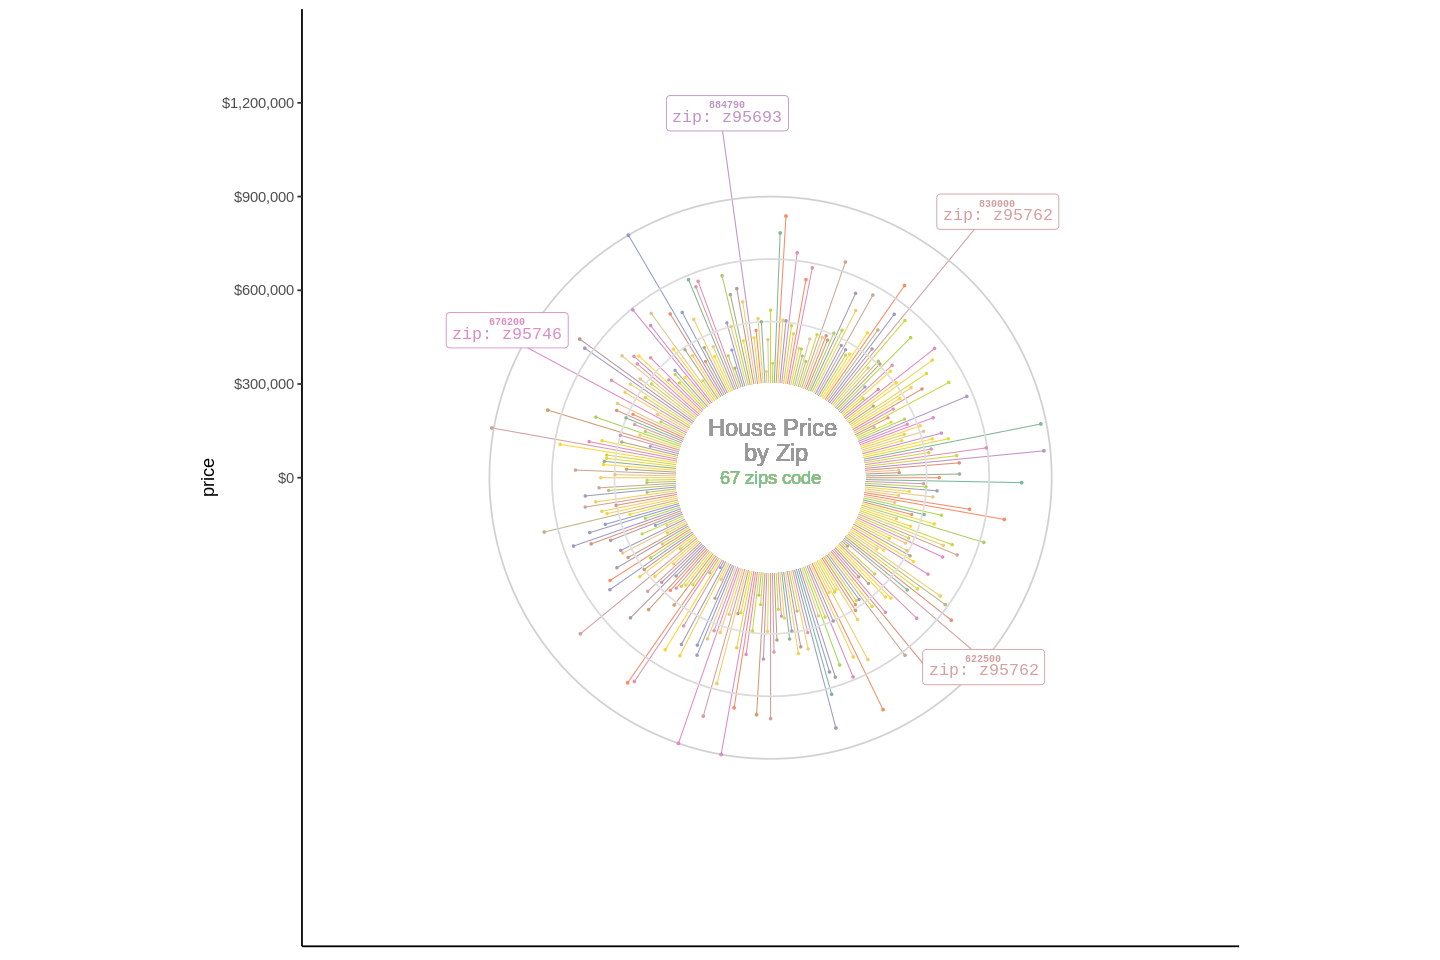

In [23]:
# take a random half of Sacramento df
set.seed(42)
rows <- sample(1:nrow(Sacramento), 320, replace=FALSE)
data <- Sacramento[rows, c("price", "zip")]

# blank middle circle to write text
circle <- 300000

# define x as rank col
plot_data <- data %>% 
  mutate(price = price + circle, rank = (1:nrow(data)))  %>%
  # see the end point of circle chart
  add_row(zip = "1", price = 800000, rank = nrow(data) + 1)

# select the top 5 in order from highest -> lowest
labels <- plot_data[with(data, order(-price)), ]
labels <- labels[1:4, ]

# format text box with html code
labels <- labels %>% 
  mutate(initial_price = price - circle,
    label = glue::glue("<b> <span style='font-size:6pt'>{initial_price}</span></b><br><span style='font-size:10pt'>zip: {zip}</span>"))

ggplot(plot_data, aes(rank, price, color = zip)) +
  geom_segment(aes(x = rank, xend = rank, y = 0, yend = price), size = .3) +
    geom_rect(aes(xmin = 1, xmax = rank, ymin = 0, ymax = circle), 
    fill = "white", color = "white") +

    geom_hline(aes(yintercept = (200000 + circle)), color = "grey88") +
    geom_hline(aes(yintercept = (400000 + circle)), color = "grey85") +
    geom_hline(aes(yintercept = (600000 + circle)), color = "grey82") +

    geom_point(aes(size = price)) +
    scale_size(range = c(.1, .5), , limits = c(circle, round(max(plot_data$price), 0)), guide = "none") +
    scale_y_continuous(labels = scales::dollar, limits =c(0, 1200000), expand = c(0,0)) +
    scale_x_continuous(limits = c(0, 320), expand = c(0,0)) +
    scale_color_manual(values = getPalette(69), guide = "none") +
    coord_polar(theta = "x") +  theme_classic() + theme(axis.text.x = element_blank(), axis.title.x = element_blank()) +
    
    geom_richtext(data = labels, aes(x = rank + 1, y = price - 10000, label = label, color = zip),
    lineheight = .5, size = 1, family = "Roboto Mono") +
    geom_text(x = 3, y = 120000, label = "House Price\n by Zip", size = 5, lineheight = .87, color = "grey60") +
    geom_text(x = 3, y = 1000, label = "67 zips code")

##### Type vs Price Distribution

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



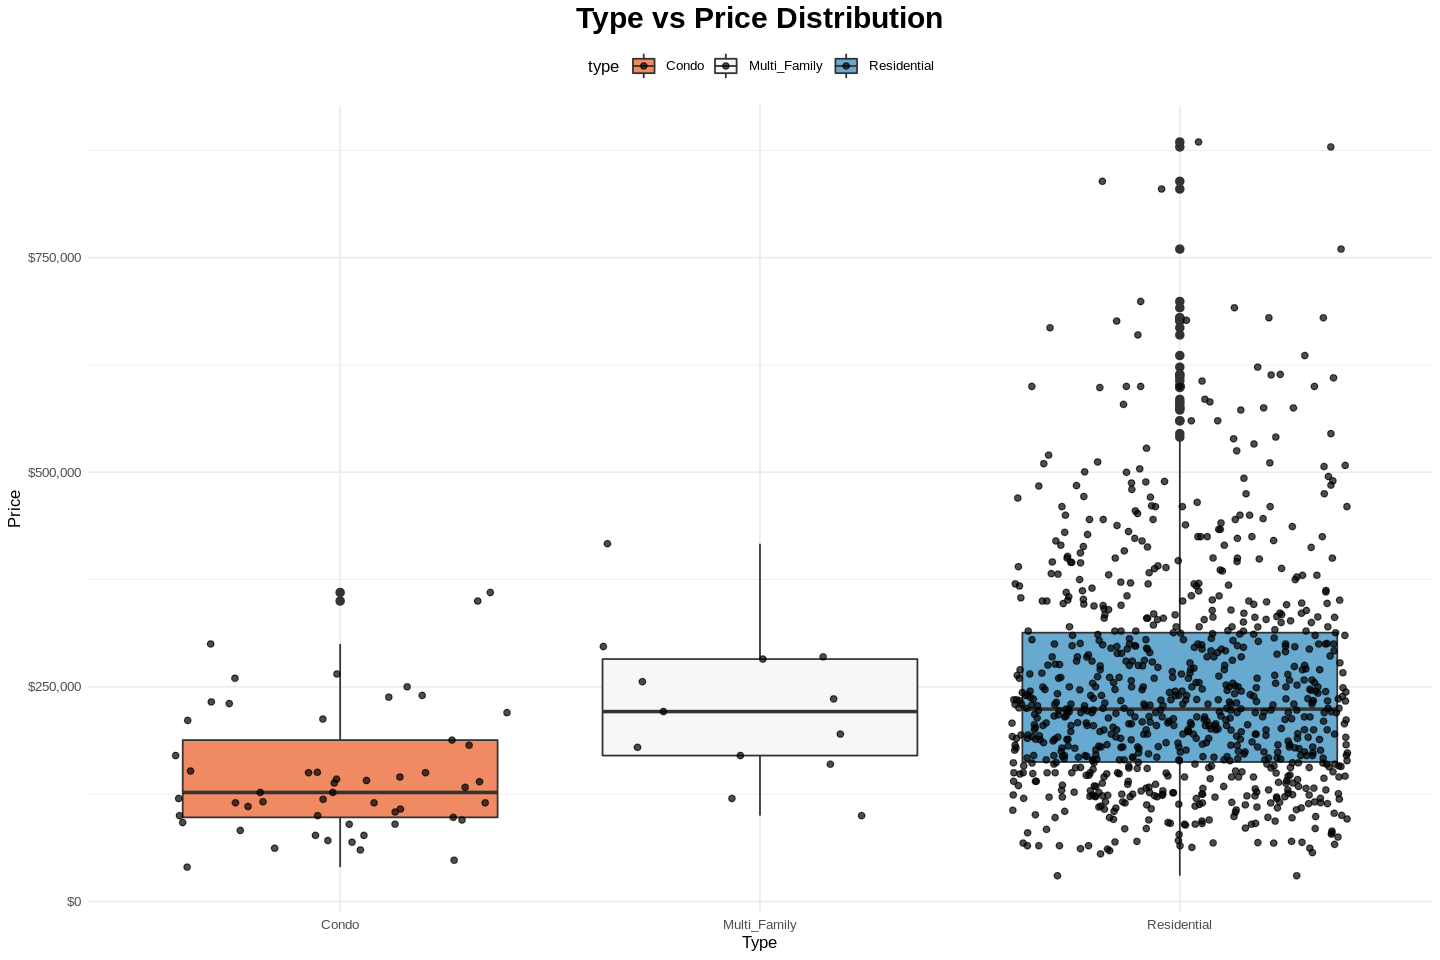

In [158]:
visualize_boxplot(Sacramento, x = type, y = price, pal = "RdBu") + 
  scale_y_continuous(labels = scales::dollar_format()) +
  labs(y = "Price", x = "Type", title = "Type vs Price Distribution") +
  theme(legend.position = "top");

Picking joint bandwidth of 32900



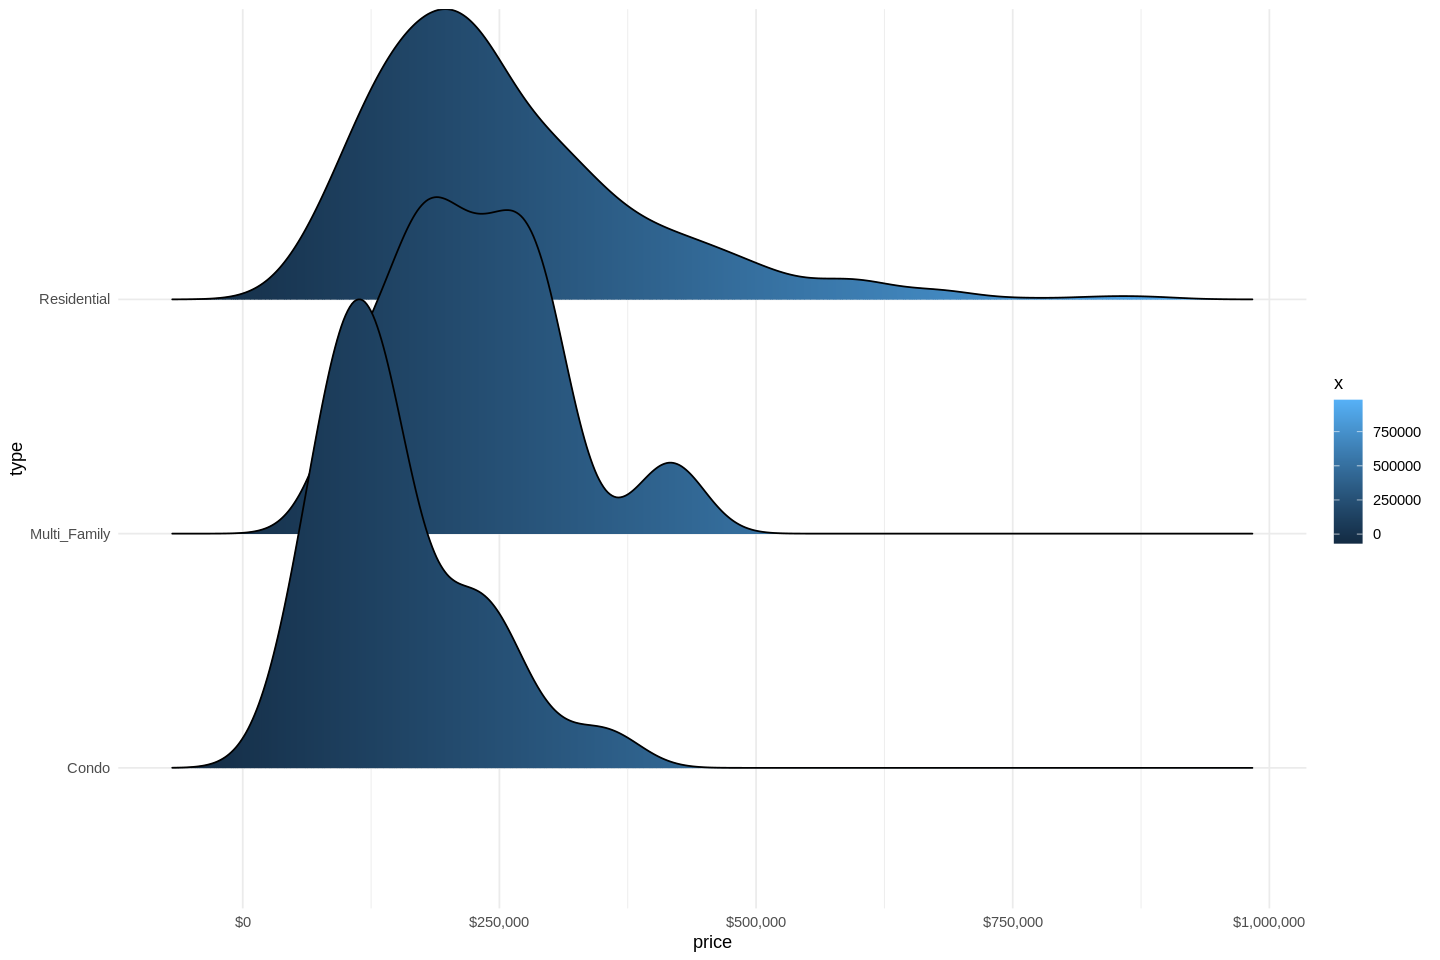

In [162]:
ggplot(Sacramento, aes(x = price, y = type, fill = ..x..)) +
    scale_x_continuous(labels = scales::dollar) + 
    geom_density_ridges_gradient(scale = 2) +
    scale_color_viridis_c(option = "plasma", guide = "none") +
    theme_minimal() + labs(ylab = "");

##### Beds / Baths by Type #Bar Chart 

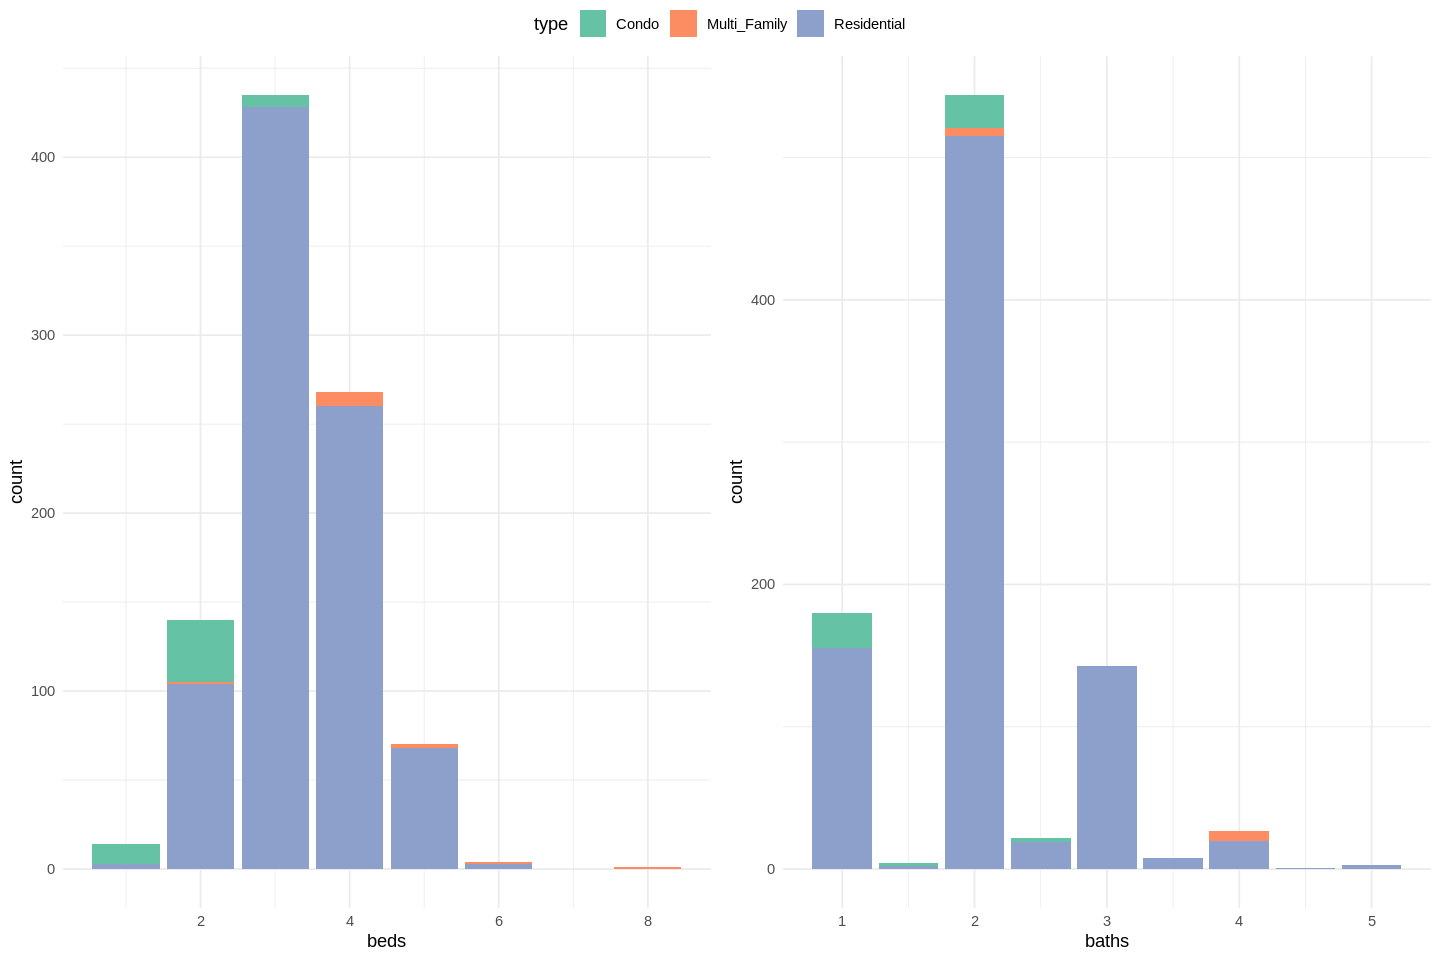

In [163]:
bar1 <- ggplot(Sacramento, aes(x = beds, fill = type)) + 
geom_bar(position = "stack") + 
scale_fill_brewer(palette = "Set2") + theme_minimal()

bar2 <- ggplot(Sacramento, aes(x = baths, fill = type)) + 
geom_bar(position = "stack") + 
scale_fill_brewer(palette = "Set2") + theme_minimal()

ggarrange(bar1, bar2, common.legend = TRUE)

##### Beds / Baths Propotion with #Segmented Bar Chart

`summarise()` has grouped output by 'baths'. You can override using the `.groups` argument.



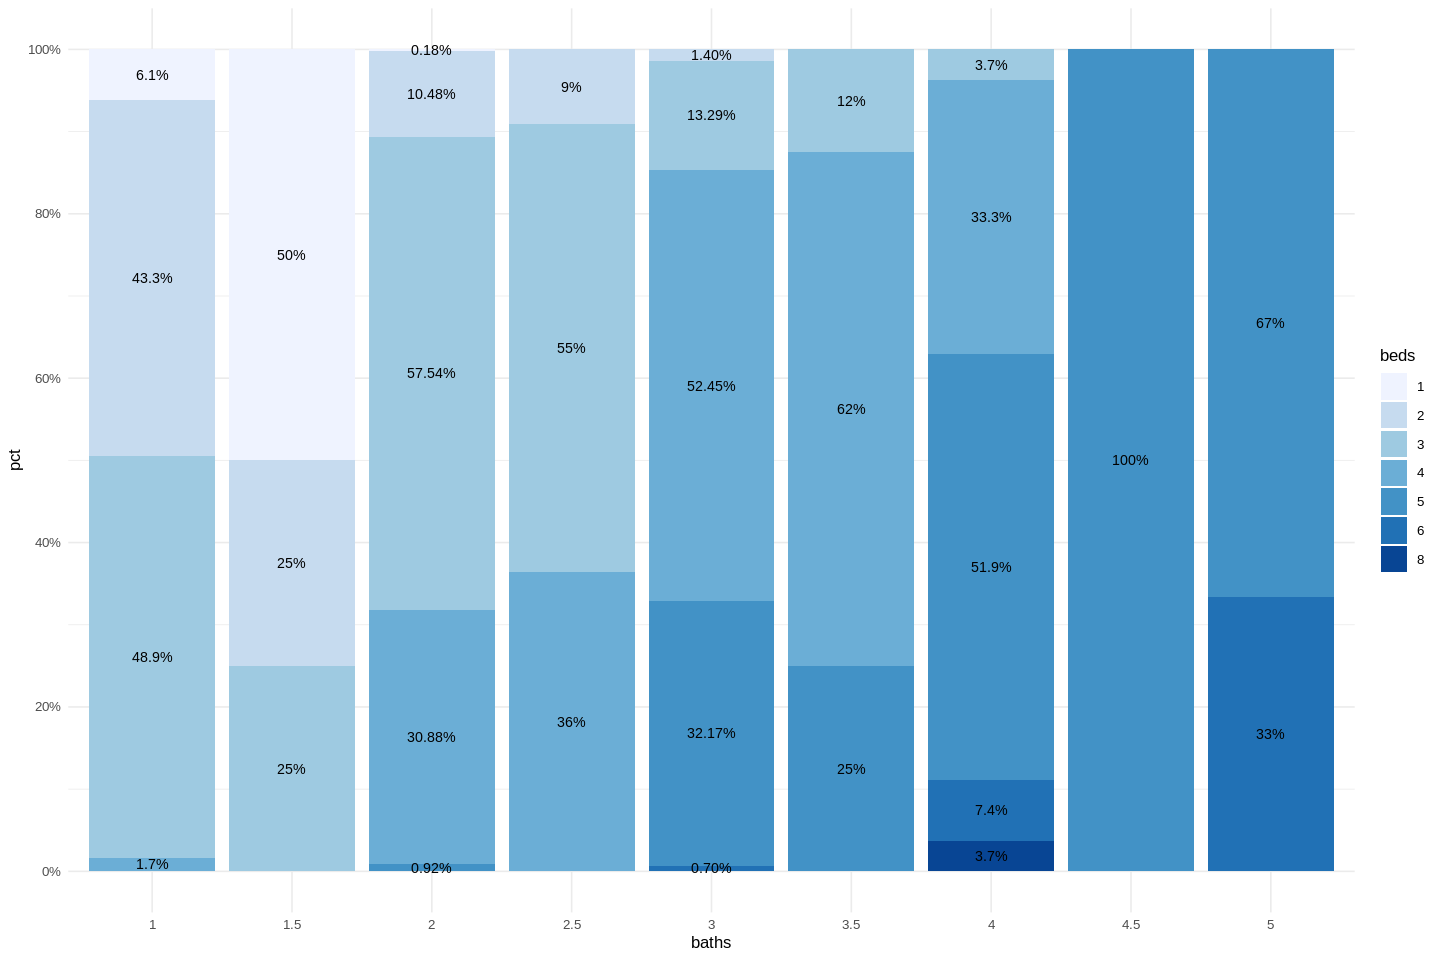

In [201]:
plot_data <- Sacramento %>% mutate(beds = as.character(beds), baths = as.character(baths))
plot_segmented_bar(plot_data, baths, beds, "Blues")

#####Comparing Average Price by Beds / Baths #Radar Chart

`summarise()` has grouped output by 'baths'. You can override using the `.groups` argument.



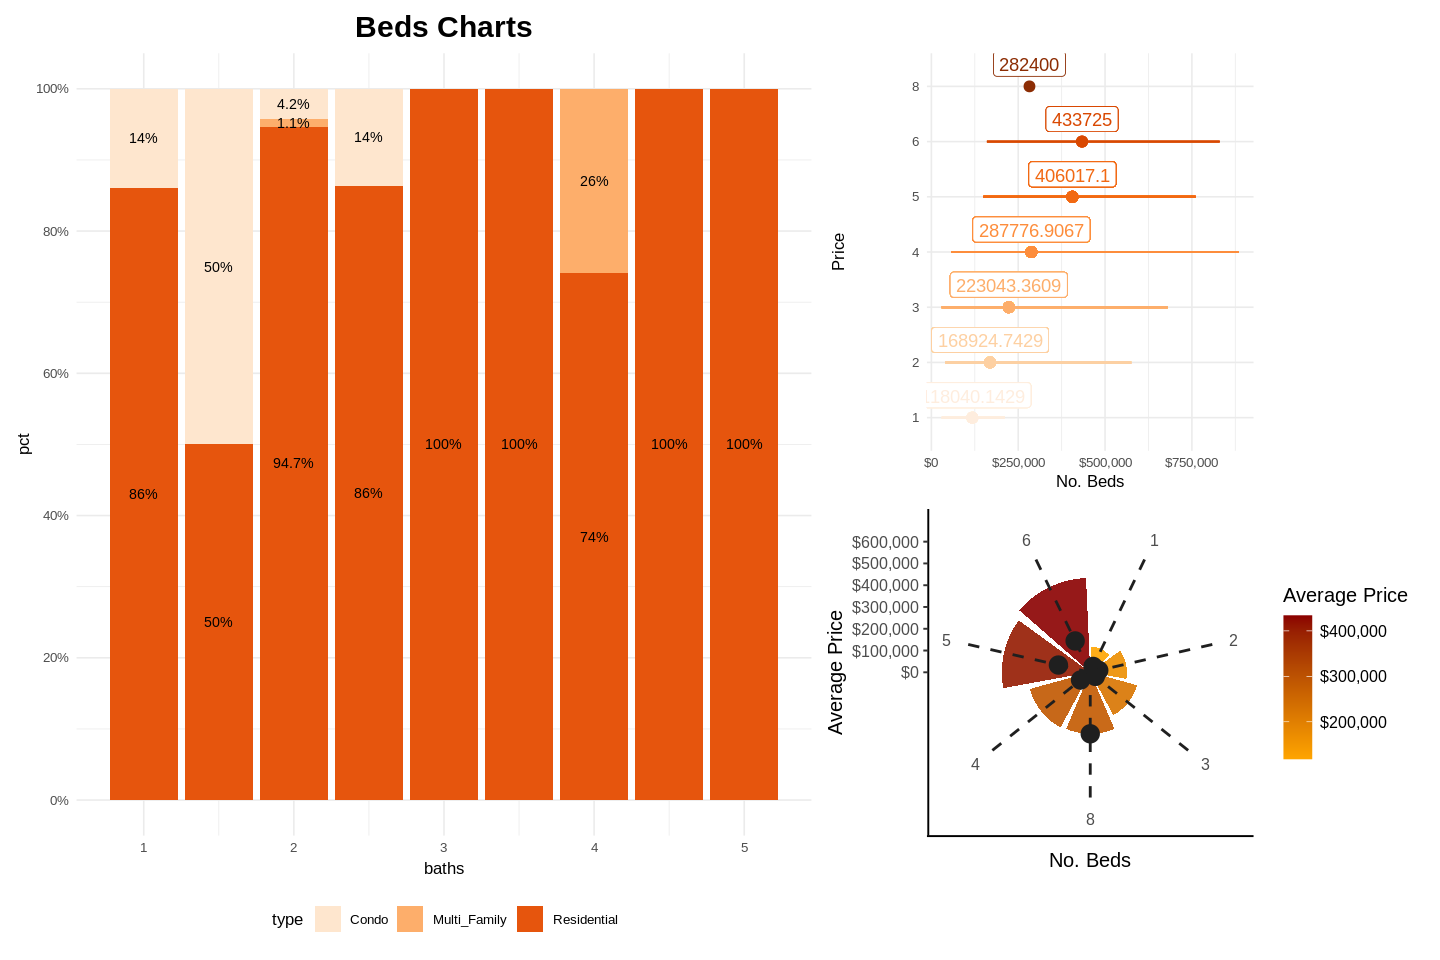

In [200]:
plot_data <- Sacramento %>% mutate(beds = as.character(beds), baths = as.character(baths))
sb <- plot_segmented_bar(Sacramento, baths, type, "Oranges") + 
    labs(title = "Beds Charts") + theme(legend.position = "bottom")

r <- plot_radar(Sacramento, beds, "No. Beds")
pr <- visualize_pointrange(Sacramento, x = as.character(beds), price, "Oranges") + 
    labs(color = "", x = "Price", y = "No. Beds") + theme(legend.position = "") +
    scale_y_continuous(labels = dollar)

(sb | pr / r) + plot_layout(widths = c(0.9, 0.4), height = c(1, 0.4, 0.6))

#### Relationship Pair Plot

#####Beds vs. Price Box Plot

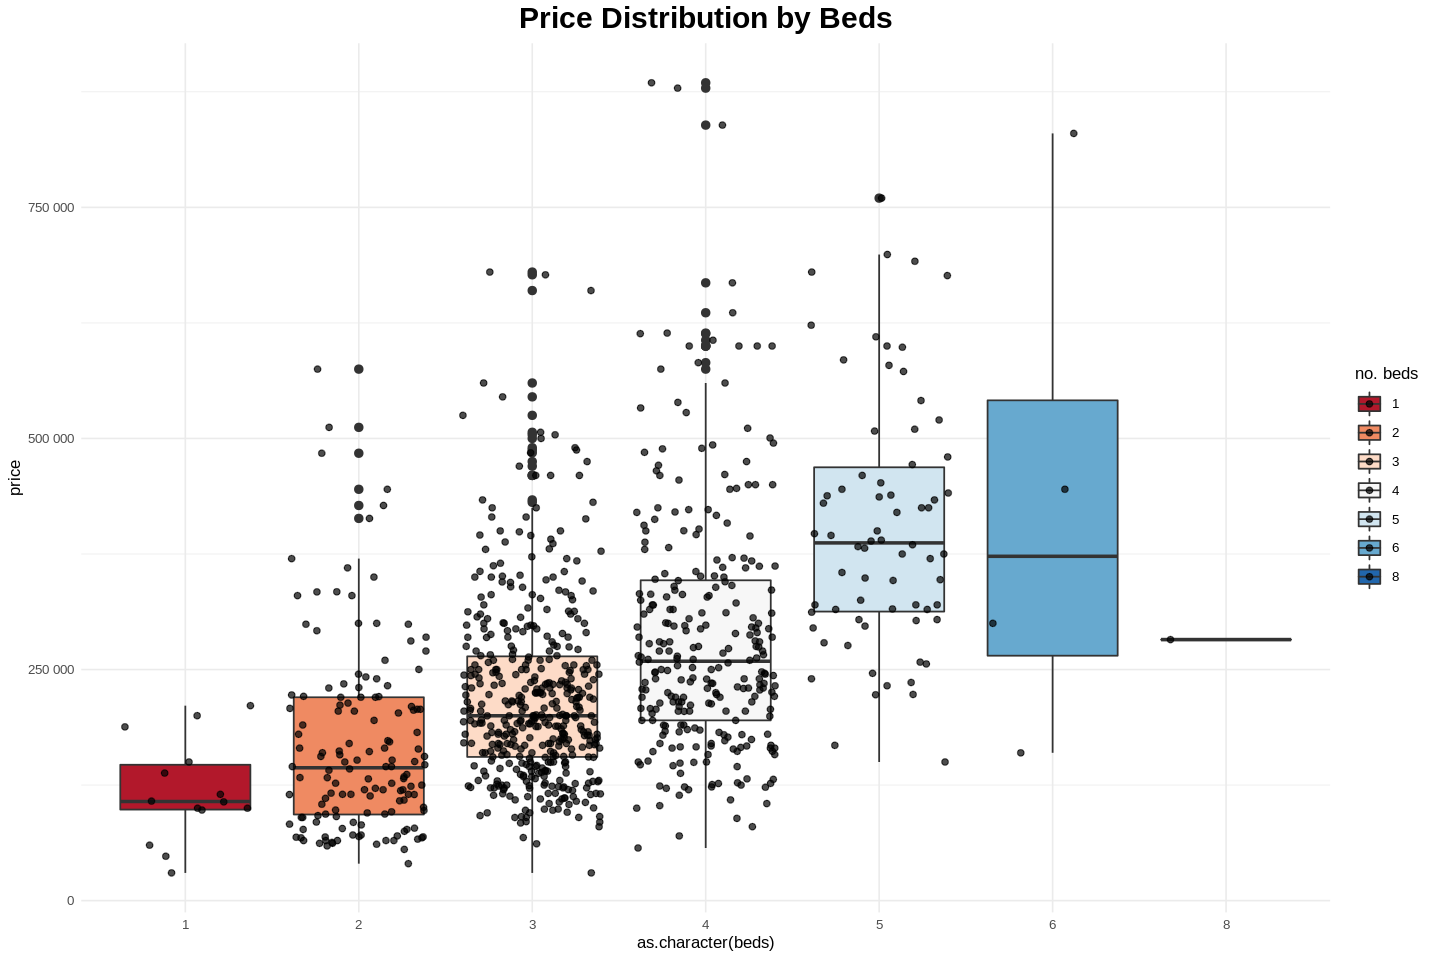

In [182]:
visualize_boxplot(Sacramento, x = as.character(beds), y = price, pal = "RdBu") +
  labs(fill = "no. beds", title = "Price Distribution by Beds");

Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.



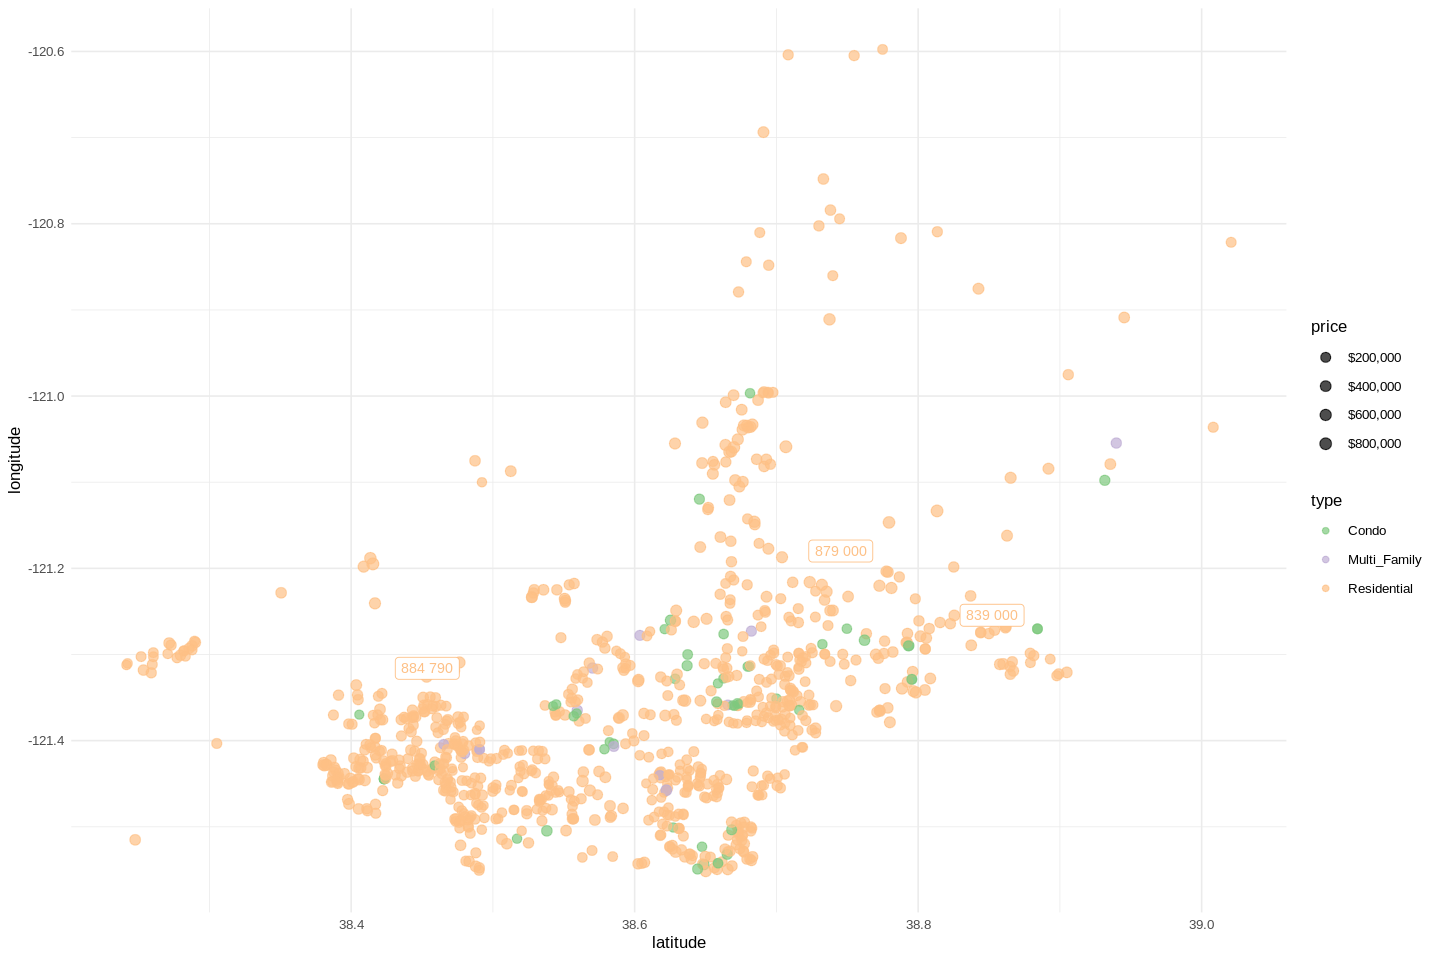

In [165]:
bubble_chart(Sacramento, latitude, longitude, pal = "Accent") + scale_size(labels = dollar, range = c(2, 3))

##### Latitude vs. Price

`geom_smooth()` using formula 'y ~ x'



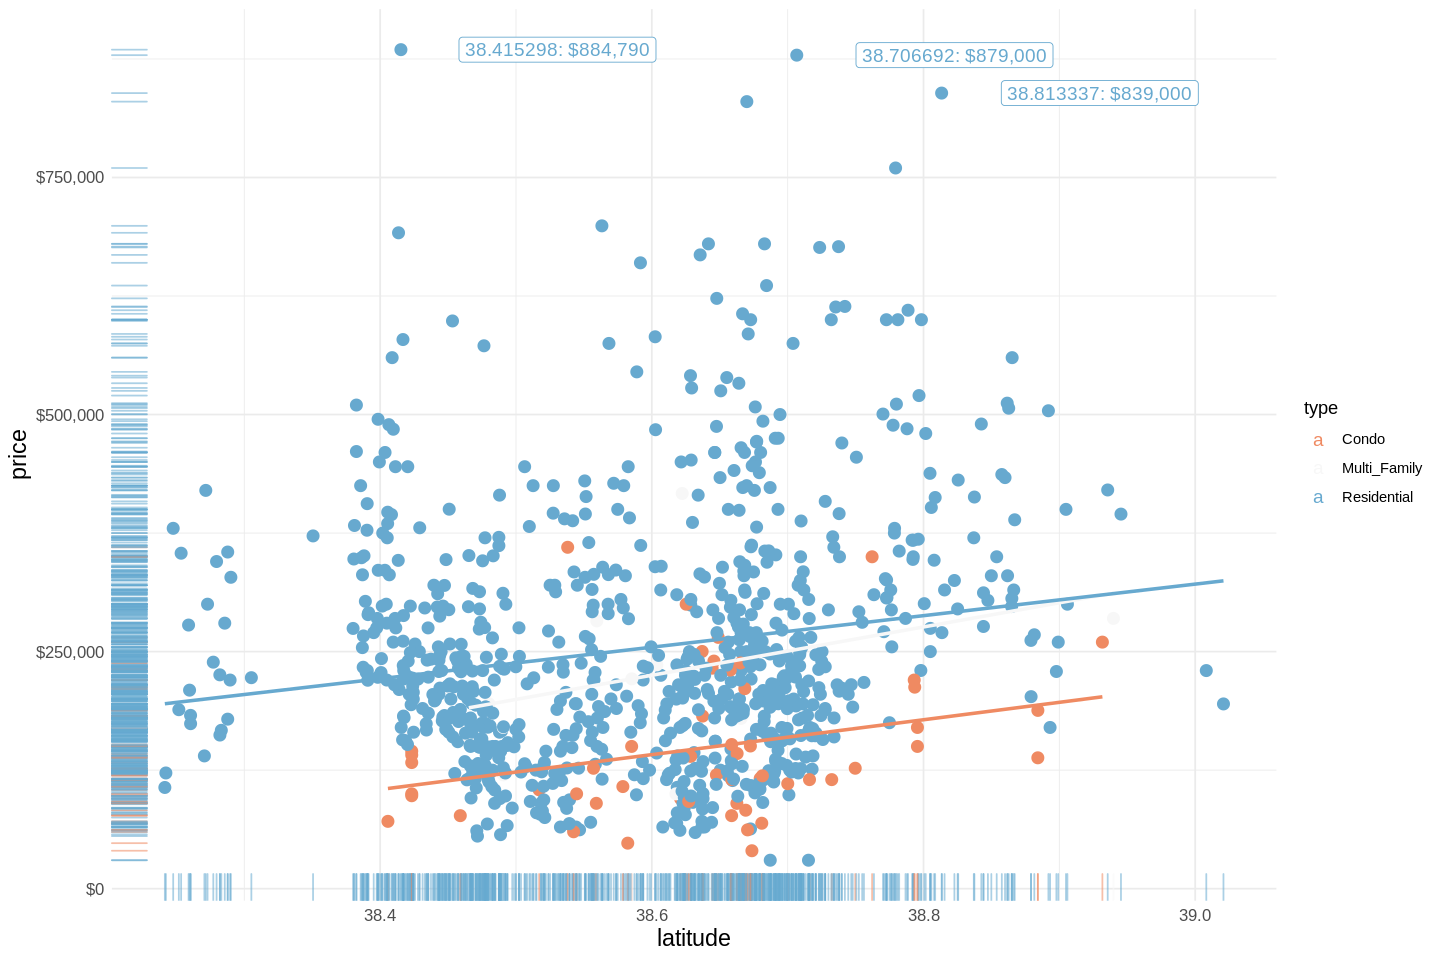

In [167]:
plot_scatter(Sacramento, latitude)

`geom_smooth()` using formula 'y ~ x'



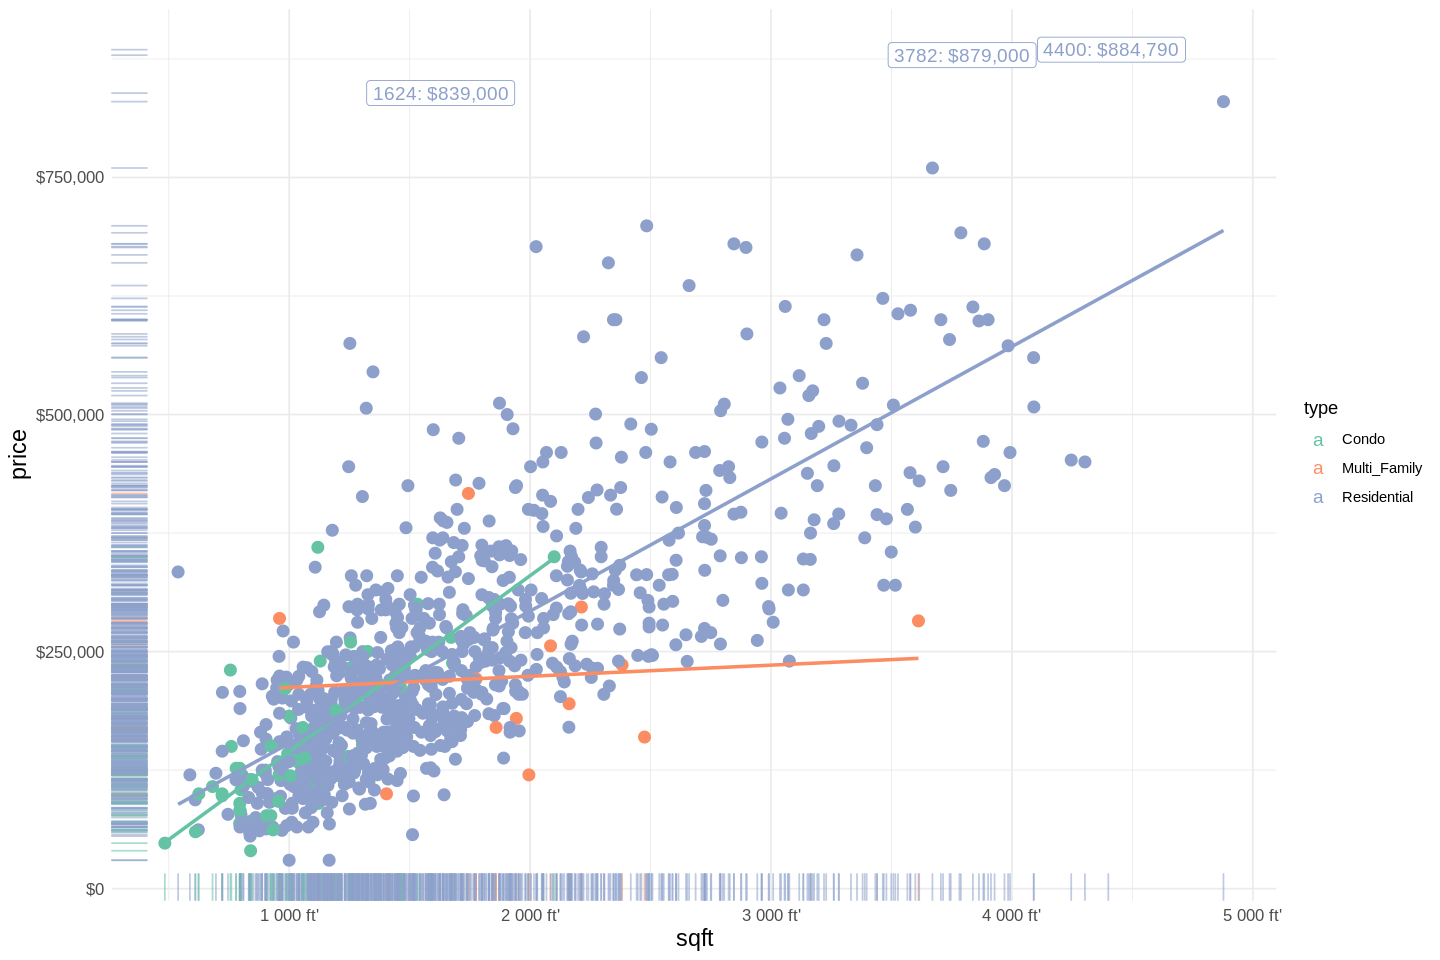

In [173]:
plot_scatter(Sacramento, sqft, price, pal = "Set2") +
scale_x_continuous(labels = unit_format(unit = "ft'"))

##### Area vs. Price Density 2D

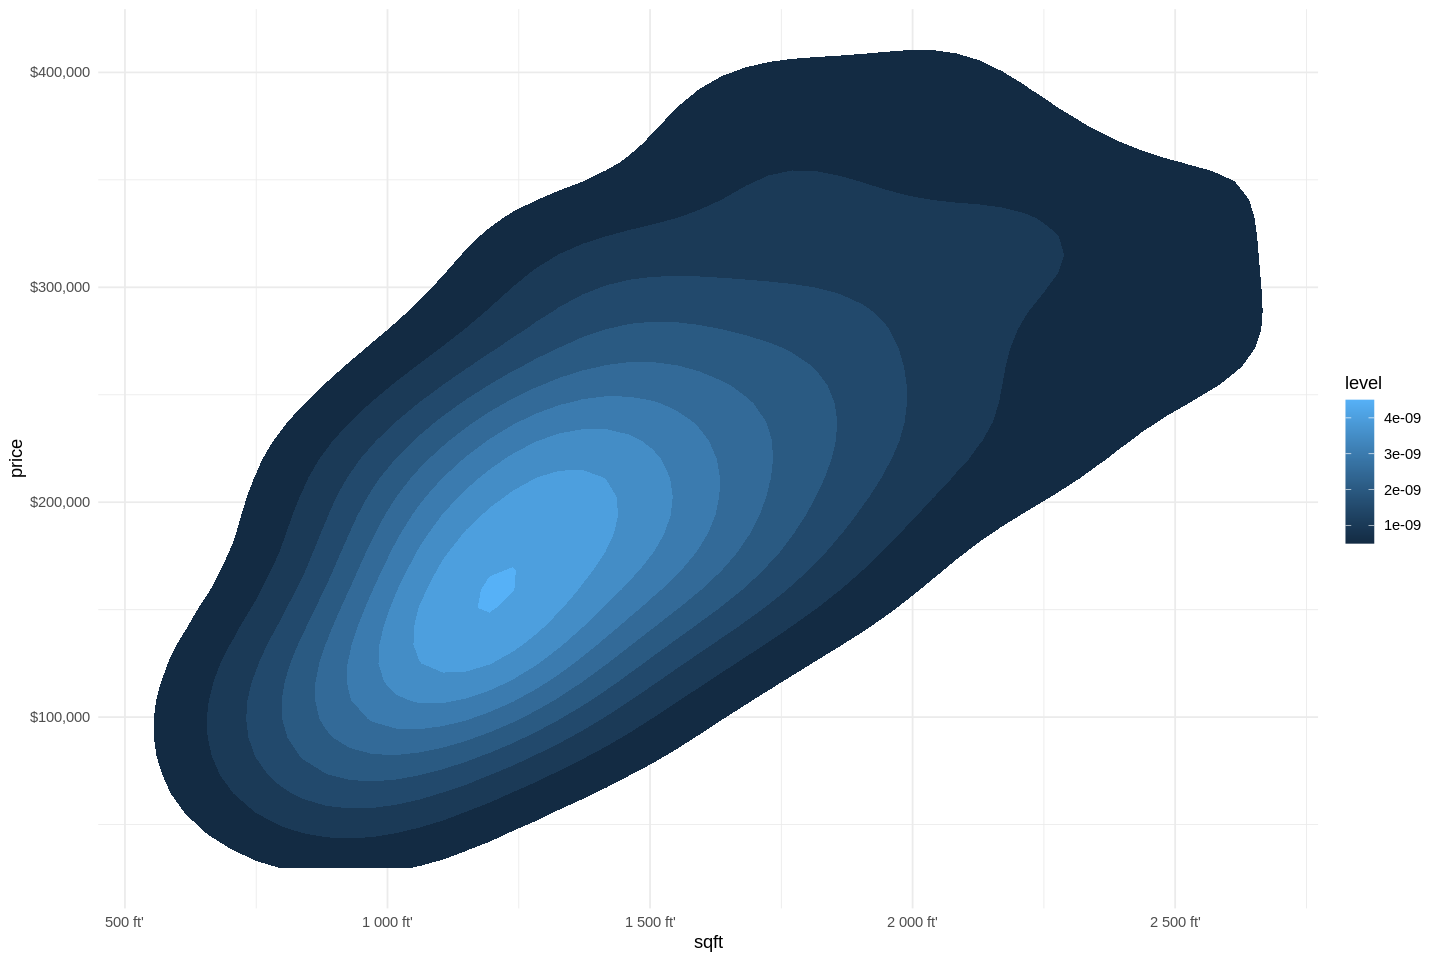

In [39]:
ggplot(Sacramento, aes(sqft, price)) +
  stat_density_2d(aes(fill = ..level..), geom = "polygon") +
  scale_y_continuous(labels = dollar) +
  scale_x_continuous(labels = unit_format(unit = "ft'")) + theme_minimal()

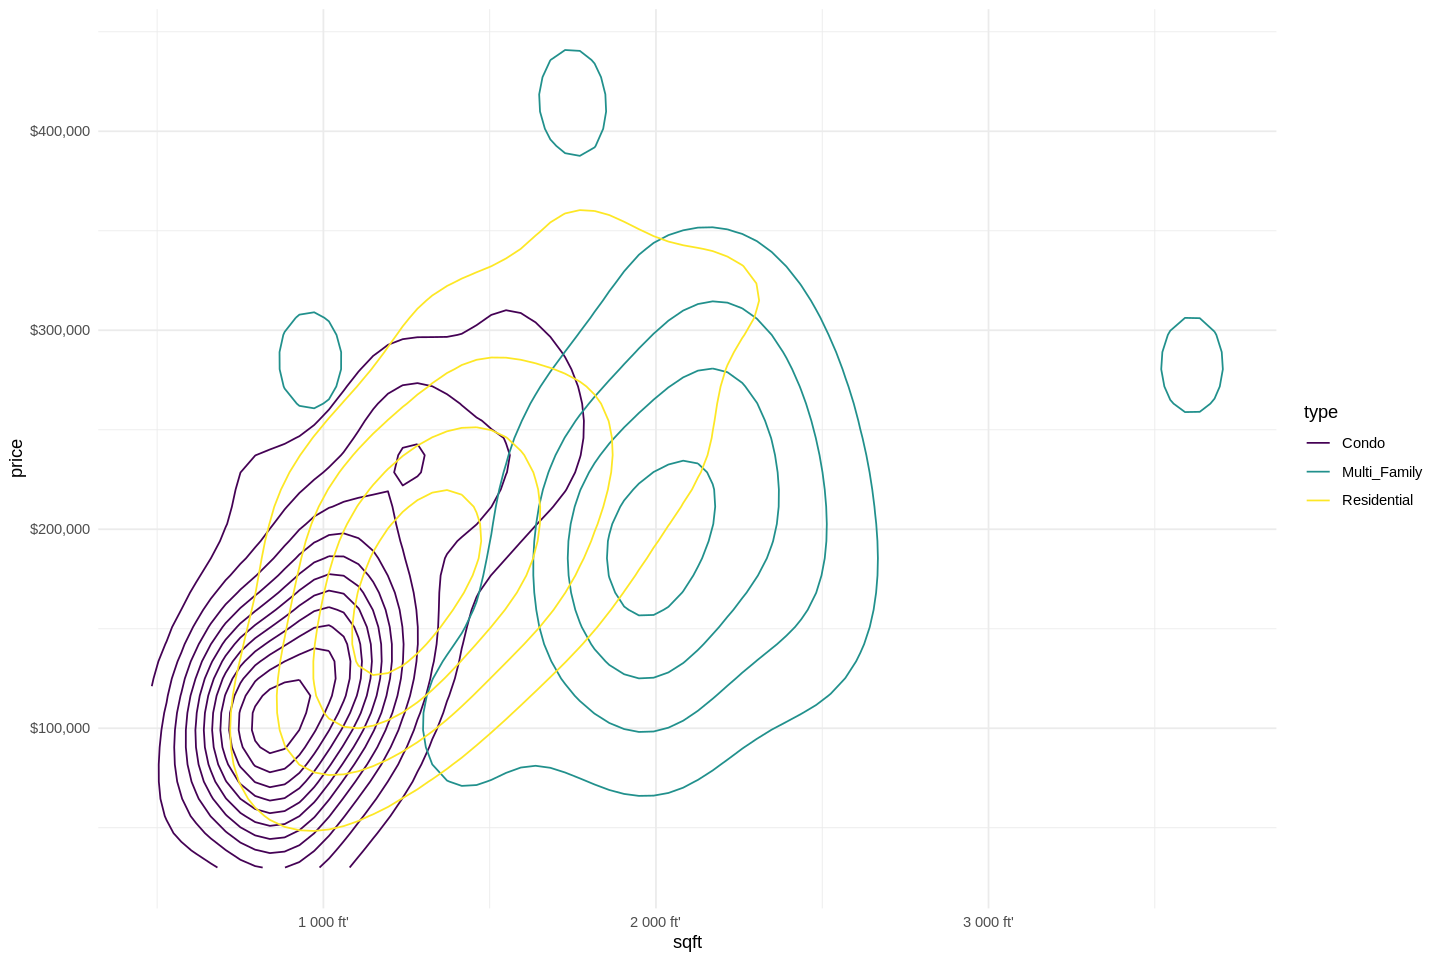

In [40]:
ggplot(Sacramento, aes(sqft, price, color = type)) +
  geom_density2d() +
  scale_y_continuous(labels = dollar) +
  scale_x_continuous(labels = unit_format(unit = "ft'")) +
  scale_color_viridis(discrete = TRUE) + theme_minimal()

#### Correlation Matrix

Visualize relationship of features and target columns, included encoded categorical features

In [41]:
install.packages(c("superml", "cleandata"))
library(superml)
library(cleandata)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Metrics’


Loading required package: R6



Encoding **categorical columns** with `encode_ordinal` from `cleandata` package

In [43]:
dataset <- data.frame(Sacramento)

In [44]:
labels_vectors = unique(unlist(dataset[, categorical_cols]))

In [45]:
dataset[, categorical_cols] <- encode_ordinal(dataset[, categorical_cols], order = labels_vectors)
dataset[, categorical_cols] <- sapply(dataset[, categorical_cols], as.numeric)

             city          zip           beds           baths      
 SACRAMENTO    :438   z95823 : 61   Min.   :1.000   Min.   :1.000  
 ELK_GROVE     :114   z95828 : 45   1st Qu.:3.000   1st Qu.:2.000  
 ROSEVILLE     : 48   z95758 : 44   Median :3.000   Median :2.000  
 CITRUS_HEIGHTS: 35   z95835 : 37   Mean   :3.276   Mean   :2.053  
 ANTELOPE      : 33   z95838 : 37   3rd Qu.:4.000   3rd Qu.:2.000  
 RANCHO_CORDOVA: 28   z95757 : 36   Max.   :8.000   Max.   :5.000  
 (Other)       :236   (Other):672                                  
           type    
 Condo       : 53  
 Multi_Family: 13  
 Residential :866  
                   
                   
                   
                   
coded 5 cols 72 levels 
             city          zip           beds           baths      
 SACRAMENTO    :438   z95823 : 61   Min.   :1.000   Min.   :1.000  
 ELK_GROVE     :114   z95828 : 45   1st Qu.:3.000   1st Qu.:2.000  
 ROSEVILLE     : 48   z95758 : 44   Median :3.000   Median :2.000  


Visualize correlation matrix

In [46]:
corr_matrix <- cor(dataset)
corr_matrix

,city,zip,beds,baths,sqft,type,price,latitude,longitude
city,1.00000000,0.56168355,-0.11671447,-0.20488509,-0.1863664,-0.015286733,-0.2095503,-0.02052533,-0.368683434
zip,0.56168355,1.00000000,-0.06225446,-0.09887112,-0.1120076,-0.017549248,-0.2125173,-0.12965710,-0.495343032
beds,-0.11671447,-0.06225446,1.00000000,0.65677220,0.7159079,0.325674610,0.4634122,-0.05362760,0.083685032
baths,-0.20488509,-0.09887112,0.65677220,1.00000000,0.7607516,0.129384522,0.5756415,0.04723159,0.179917079
sqft,-0.18636636,-0.11200759,0.71590791,0.76075156,1.0000000,0.202435323,0.7673609,0.04224950,0.236446342
type,-0.01528673,-0.01754925,0.32567461,0.12938452,0.2024353,1.000000000,0.1841996,-0.08474030,0.005890031
price,-0.20955032,-0.21251733,0.46341217,0.57564155,0.7673609,0.184199576,1.0000000,0.15480838,0.363022726
latitude,-0.02052533,-0.12965710,-0.05362760,0.04723159,0.0422495,-0.084740299,0.1548084,1.00000000,0.382346653
longitude,-0.36868343,-0.49534303,0.08368503,0.17991708,0.2364463,0.005890031,0.3630227,0.38234665,1.000000000


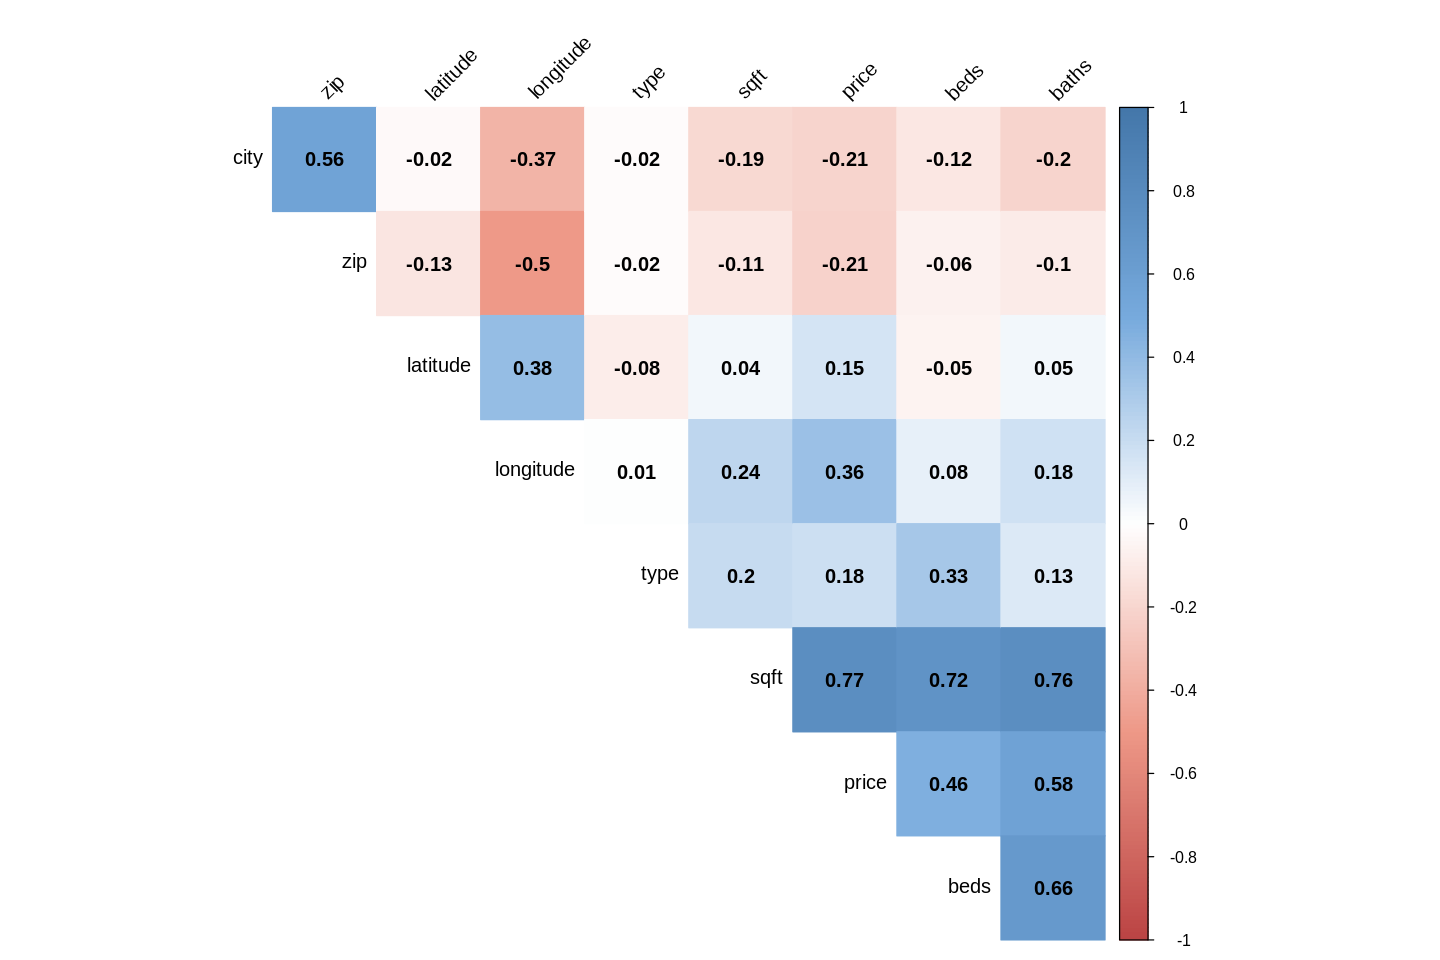

In [47]:
col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
corrplot(corr_matrix, method = "color", col=col(200), diag=FALSE,
         type = "upper", order = "hclust", 
         addCoef.col = "black",
         tl.col = "black", tl.srt = 45,
         sig.level = 0.01, insig = "blank");

### *References*

In [ ]:
# - [Machine learning in r step-by-step](https://machinelearningmastery.com/machine-learning-in-r-step-by-step/)


# - [Comparing Models Performance](https://machinelearningmastery.com/compare-the-performance-of-machine-learning-algorithms-in-r/)

# - [Residual Analysis](https://rpubs.com/iabrady/residual-analysis)
# - [Residual Plot](https://www.statology.org/residual-plot-r/)


# - [Regression Models Visualzation](https://datascienceplus.com/machine-learning-results-in-r-one-plot-to-rule-them-all-part-2-regression-models/)

# - [R Boxplot](https://t-redactyl.io/blog/2016/04/creating-plots-in-r-using-ggplot2-part-10-boxplots.html)


# - [The R Graph Gallery](https://www.r-graph-gallery.com/index.html)

# - [Visualize corr matrix](http://www.sthda.com/english/wiki/visualize-correlation-matrix-using-correlogram)


# - [Expand Color Palette](https://www.r-bloggers.com/2013/09/how-to-expand-color-palette-with-ggplot-and-rcolorbrewer/)

# - [olsrr package](https://github.com/rsquaredacademy/olsrr)
# - [yellowbrick](https://www.scikit-yb.org/en/latest/)
# - [lares package](https://github.com/laresbernardo/lares)
# - [topepo github](https://topepo.github.io/caret/)
# - StackOverflow